In [209]:
import wfdb
from wfdb import processing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [43]:
print(wfdb.show_ann_classes())
print(wfdb.show_ann_labels())

     extension                        description  human_reviewed
atr        atr          Reference ECG annotations            True
blh        blh         Human reviewed beat labels            True
blm        blm                Machine beat labels           False
alh        alh              Human reviewed alarms            True
alm        alm                     Machine alarms           False
qrsc      qrsc      Human reviewed QRS detections            True
qrs        qrs             Machine QRS detections           False
bph        bph  Human reviewed BP beat detections            True
bpm        bpm         Machine BP beat detections           False
None
    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle bra

In [73]:
help(wfdb.Annotation)

Help on class Annotation in module wfdb.io.annotation:

class Annotation(builtins.object)
 |  Annotation(record_name, extension, sample, symbol=None, subtype=None, chan=None, num=None, aux_note=None, fs=None, label_store=None, description=None, custom_labels=None, contained_labels=None)
 |  
 |  The class representing WFDB annotations.
 |  
 |  Annotation objects can be created using the initializer, or by reading a
 |  WFDB annotation file with `rdann`.
 |  
 |  The attributes of the Annotation object give information about the
 |  annotation as specified by:
 |  https://www.physionet.org/physiotools/wag/annot-5.htm
 |  
 |  Call `show_ann_labels()` to see the list of standard annotation codes. Any
 |  text used to label annotations that are not one of these codes should go in
 |  the 'aux_note' field rather than the 'sym' field.
 |  
 |  The current annotation values organized as such:
 |  
 |      AnnotationLabel(label_store (or subtype), symbol (or aux_note), short_description, des

Infant 2 ECG: {'fs': 500, 'sig_len': 78916000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['II'], 'comments': []}
Infant 2 Resp: {'fs': 50, 'sig_len': 7891433, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


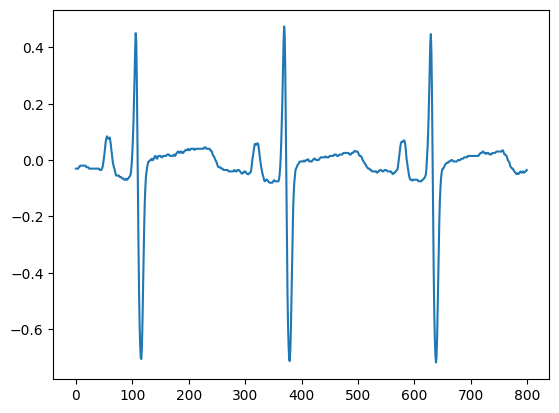

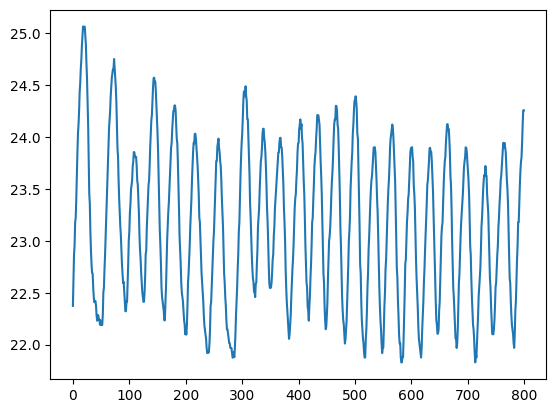

In [2]:
data_dir = "../data"
infant2_ecg_record = wfdb.rdsamp(f"{data_dir}/infant2_ecg")
infant2_resp_record = wfdb.rdsamp(f"{data_dir}/infant2_resp")
print("Infant 2 ECG: " + str(infant2_ecg_record[1]))
print("Infant 2 Resp: " + str(infant2_resp_record[1]))
plt.figure(1)
plt.plot(infant2_ecg_record[0][300000:300800])
plt.figure(2)
plt.plot(infant2_resp_record[0][300000:300800])

In [42]:
record = wfdb.rdrecord(f"{data_dir}/infant2_ecg", sampto=300)
annotation = wfdb.rdann(f"{data_dir}/infant2_ecg", 'qrsc', sampto=300)
# plt.plot(infant2_ecg_record[0][300000:300800])

     extension                        description  human_reviewed
atr        atr          Reference ECG annotations            True
blh        blh         Human reviewed beat labels            True
blm        blm                Machine beat labels           False
alh        alh              Human reviewed alarms            True
alm        alm                     Machine alarms           False
qrsc      qrsc      Human reviewed QRS detections            True
qrs        qrs             Machine QRS detections           False
bph        bph  Human reviewed BP beat detections            True
bpm        bpm         Machine BP beat detections           False
None


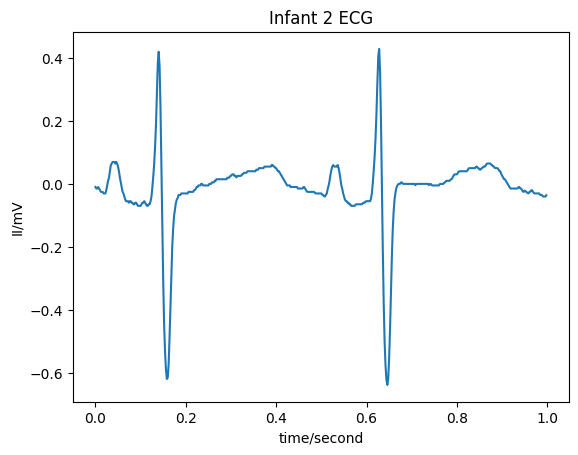

{'record_name': 'infant2_ecg',
 'n_sig': 1,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 500,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['II'],
 'p_signal': array([[-0.00982986],
        [-0.01474478],
        [-0.01474478],
        [-0.00982986],
        [-0.01474478],
        [-0.01965971],
        [-0.02539379],
        [-0.02539379],
        [-0.02539379],
        [-0.03030872],
        [-0.03030872],
        [-0.03030872],
        [-0.01965971],
        [-0.00491493],
        [ 0.00982986],
        [ 0.01965971],
        [ 0.04013858],
        [ 0.05979829],
        [ 0.06471322],
        [ 0.06962815],
        [ 0.06962815],
        [ 0.06962815],
        [ 0.06471322],
        [ 0.06962815],
        [ 0.06471322],
        [ 0.05488336],
        [ 0.04013858],
        [ 0.02047887],
        [ 0.00491493],
        [-0.00982986],
        [-0.02457464],
        [-0.03030872],
        [-0.04013858],
        [-0.04996843],
        [

In [18]:

record = wfdb.rdrecord(f"{data_dir}/infant2_ecg", sampto=500, channels=[0]) 
wfdb.plot_wfdb(record=record, title='Infant 2 ECG') 
display(record.__dict__)

# infant2_ecg_record_50hz, infant2_ecg_record_50hz_t = processing.resample_sig(infant2_ecg_record[0],infant2_ecg_record[1]['fs'], 50)
# plt.figure(1)
# plt.plot(infant2_ecg_record[0][300000:300800])

In [122]:
def resample_sig_test(x, fs, fs_target):
    """
    Resample a signal to a different frequency.

    Parameters
    ----------
    x : ndarray
        Array containing the signal.
    fs : int, float
        The original sampling frequency.
    fs_target : int, float
        The target frequency.

    Returns
    -------
    resampled_x : ndarray
        Array of the resampled signal values.
    resampled_t : ndarray
        Array of the resampled signal locations.

    """
    t = np.arange(x.shape[0]).astype('float64')

    if fs == fs_target:
        return x, t

    new_length = int(x.shape[0]*fs_target/fs)
    # Resample the array if NaN values are present
    if np.isnan(x).any():
        x = pd.Series(x.reshape((-1,))).interpolate().values

    resampled_x, resampled_t = scipy.signal.resample(x, num=new_length, t=t)
    print(resampled_x.shape)
    resampled_t[]
    print(resampled_t.shape)
    assert resampled_x.shape == resampled_t.shape and resampled_x.shape[0] == new_length
    assert np.all(np.diff(resampled_t) > 0)

    return resampled_x, resampled_t

In [ ]:
def resample_ann_test(ann_sample, fs, fs_target):
    """
    Compute the new annotation indices.

    Parameters
    ----------
    ann_sample : ndarray
        Array of annotation locations.
    fs : int
        The starting sampling frequency.
    fs_target : int
        The desired sampling frequency.

    Returns
    -------
    ndarray
        Array of resampled annotation locations.

    """
    ratio = fs_target / fs
    return (ratio * ann_sample).astype(np.int64)

In [ ]:
signals, fields = wfdb.rdsamp(f"{data_dir}/infant2_ecg", channels=[0], sampto=1000)
# print(type(signals))
# print(signals.shape)
# print(signals.ndim)
# print(fields['fs'])
signals_2 = processing.resample_sig(signals, fields['fs'], 50)
ann = wfdb.rdann(f"{data_dir}/infant2_ecg", 'qrsc')
ann_2 = processing.resample_ann(ann, fields['fs'], 50)
# display(signals)
# display(fields)
# signals_2, ann_2 = processing.resample_singlechan(signals, ann, fields['fs'], 50)


{'fs': 500, 'sig_len': 11500, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['II'], 'comments': []}
500
[0 0 0 0 0 0]


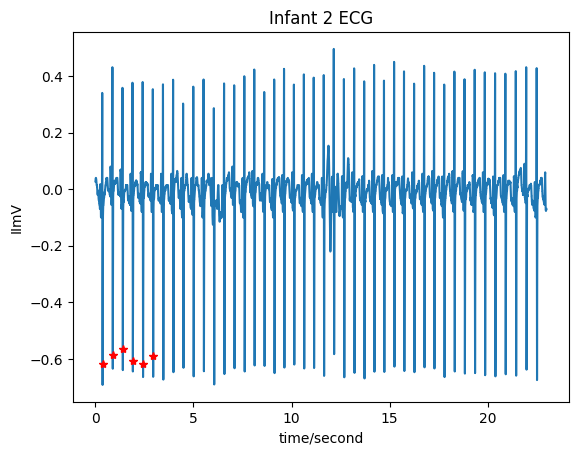

In [87]:
signals_ecg = wfdb.rdsamp(f"{data_dir}/infant2_ecg", sampfrom=598500, sampto=610000)
record_ecg = wfdb.rdrecord(f"{data_dir}/infant2_ecg", sampfrom=598500, sampto=610000)
annotation_ecg = wfdb.rdann(f"{data_dir}/infant2_ecg", 'qrsc', sampfrom=598500, sampto=600000, shift_samps=True)
print(signals_ecg[1])
print(record.fs)
print(annotation_ecg.chan)
wfdb.plot_wfdb(record=record_ecg, annotation=annotation_ecg,
               title='Infant 2 ECG',
               time_units='seconds')

In [82]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

Frequency:500, Signal Length: 30000, Start Time: 1.0 mins, End Time: 2.0 mins


C:\Users\Justin Chong\AppData\Local\Temp\ipykernel_33204\1579911751.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',
C:\Users\Justin Chong\AppData\Local\Temp\ipykernel_33204\1579911751.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',


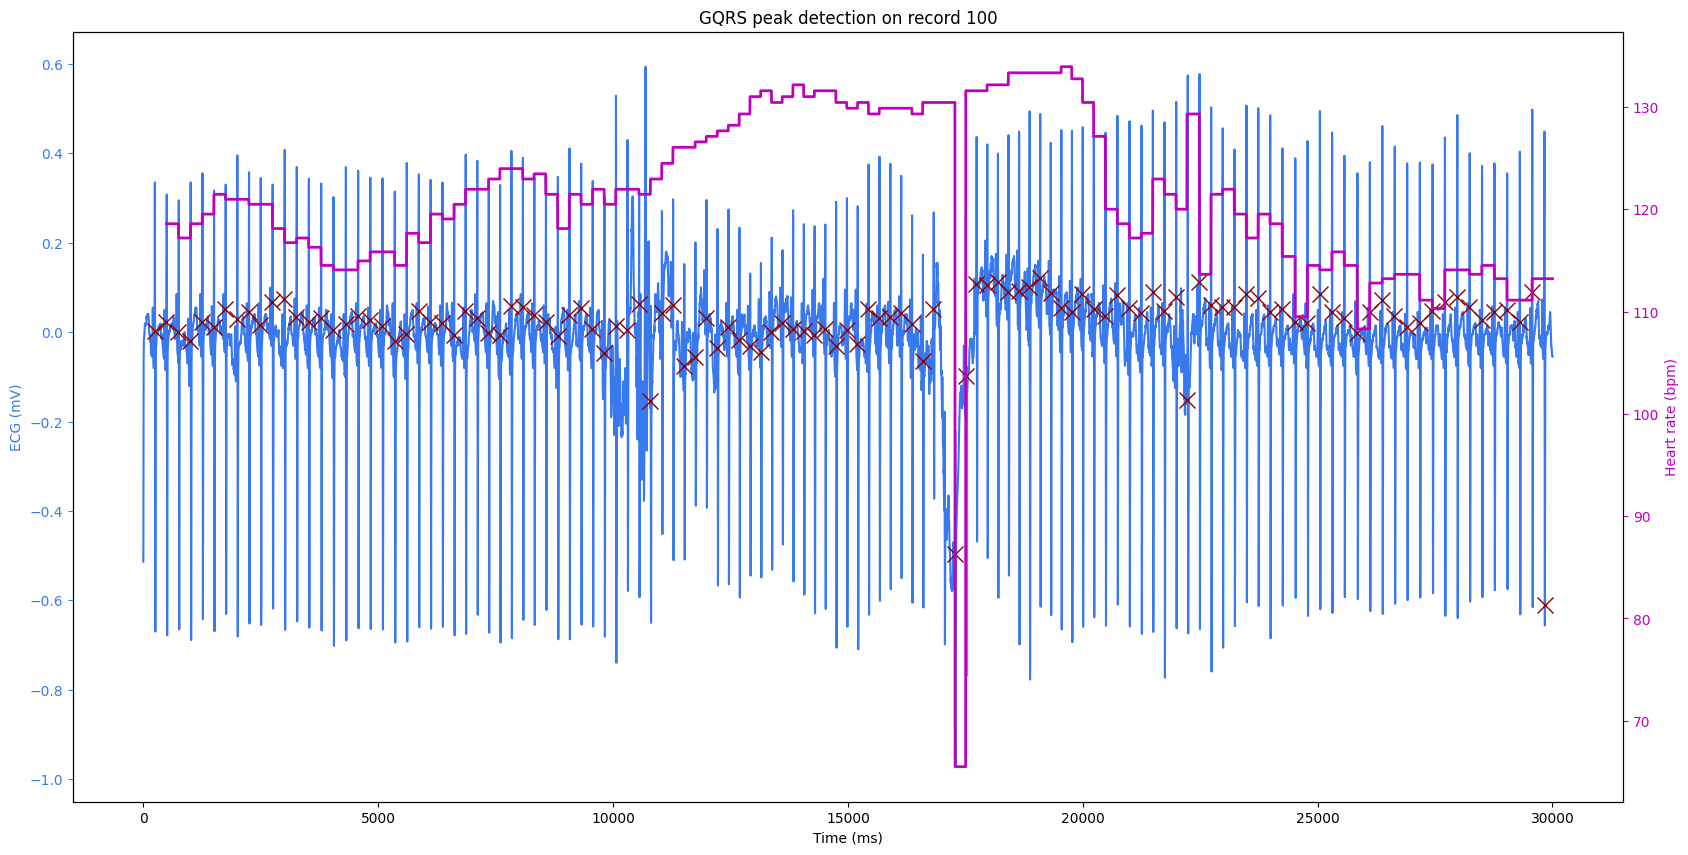

In [140]:
# Compute Heart Rate
duration = 30000 # 10 mins 
startNum = duration*1
endNum = duration*2
signals_ecg = wfdb.rdsamp(f"{data_dir}/infant2_ecg", sampfrom=startNum, sampto=endNum)
record_ecg = wfdb.rdrecord(f"{data_dir}/infant2_ecg", sampfrom=startNum, sampto=endNum)
annotation_ecg = wfdb.rdann(f"{data_dir}/infant2_ecg", 'qrsc', sampfrom=startNum, sampto=endNum, shift_samps=True)
startTime = (startNum/record_ecg.fs)/60
endTime = (endNum/record_ecg.fs)/60
print(f"Frequency:{record_ecg.fs}, Signal Length: {record_ecg.sig_len}, Start Time: {startTime} mins, End Time: {endTime} mins")
# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record_ecg.p_signal, fs=record.fs)
# Plot results
peaks_hr(sig=record_ecg.p_signal, peak_inds=qrs_inds, fs=record_ecg.fs,
         title="GQRS peak detection on record 100")


Frequency:500, Signal Length: 300000, Start Time: 70.0 mins, End Time: 80.0 mins


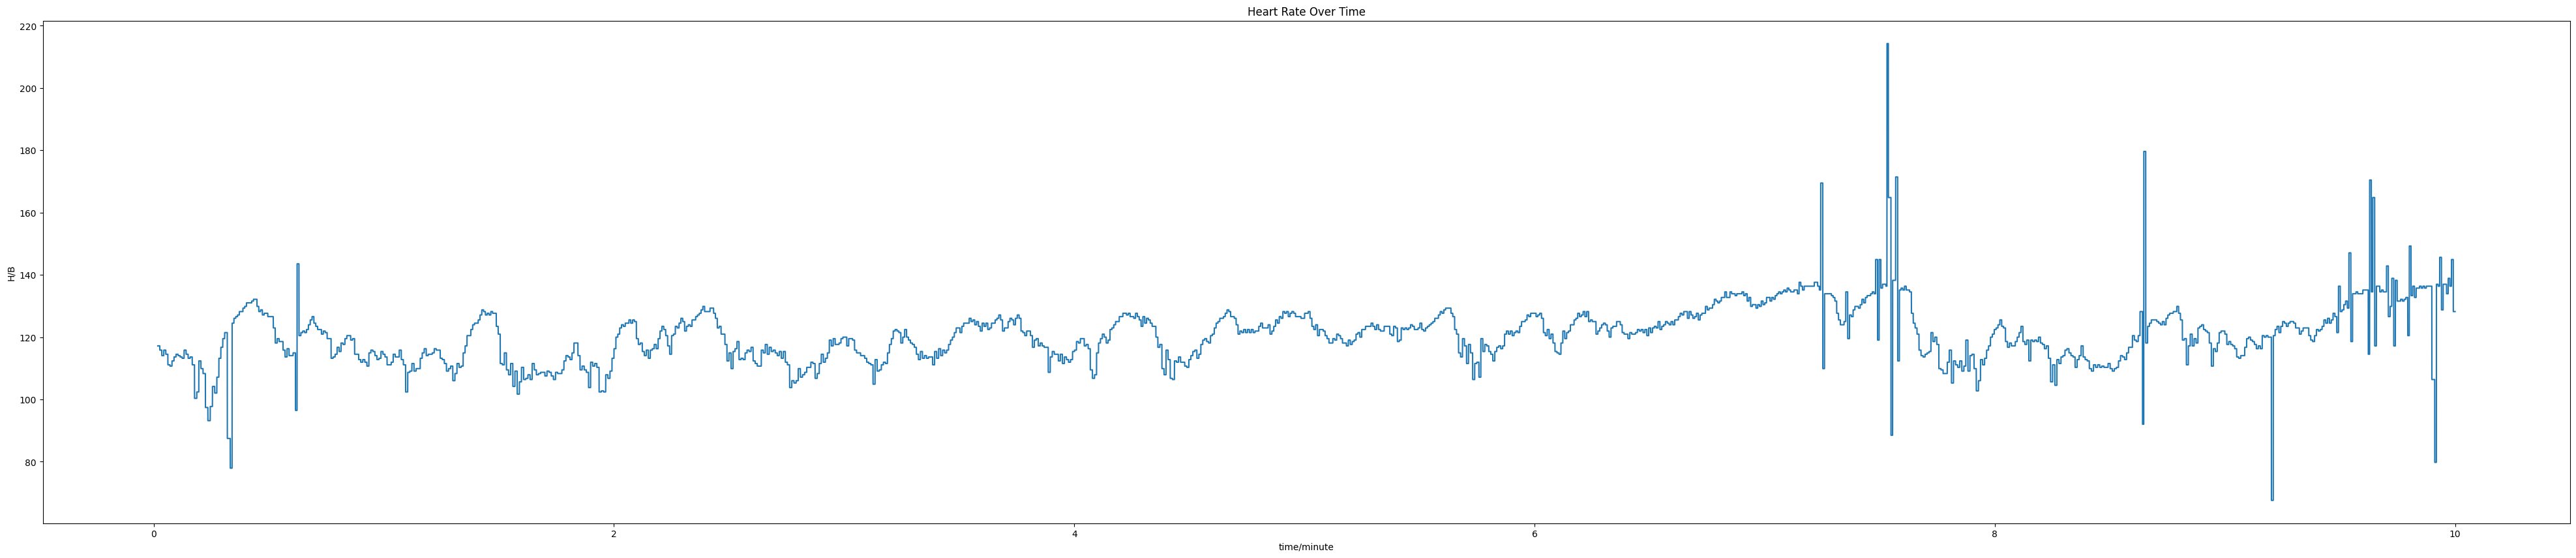

In [186]:
# Calculate heart rate
duration = 300000 # 10 mins 
kth = 7
startNum = duration*kth
endNum = duration*(kth+1)
signals_ecg = wfdb.rdsamp(f"{data_dir}/infant2_ecg", sampfrom=startNum, sampto=endNum)
record_ecg = wfdb.rdrecord(f"{data_dir}/infant2_ecg", sampfrom=startNum, sampto=endNum)
annotation_ecg = wfdb.rdann(f"{data_dir}/infant2_ecg", 'qrsc', sampfrom=startNum, sampto=endNum, shift_samps=True)
startTime = (startNum/record_ecg.fs)/60
endTime = (endNum/record_ecg.fs)/60
print(f"Frequency:{record_ecg.fs}, Signal Length: {record_ecg.sig_len}, Start Time: {startTime} mins, End Time: {endTime} mins")
qrs_inds = processing.qrs.gqrs_detect(sig=signals_ecg[0], fs=record_ecg.fs)
signals_heartrate = processing.hr.compute_hr(sig_len=record_ecg.p_signal.shape[0], qrs_inds=qrs_inds, fs=record_ecg.fs)
wfdb.plot_items(signal=signals_heartrate, 
                fs=record_ecg.fs, 
                time_units='minutes', 
                sig_name='Heart Rate', 
                sig_units='Beats per Minute', 
                title='Heart Rate Over Time', 
                figsize=(50,10))


Frequency:500, Signal Length: 300000, Start Time: 0.0 mins, End Time: 10.0 mins


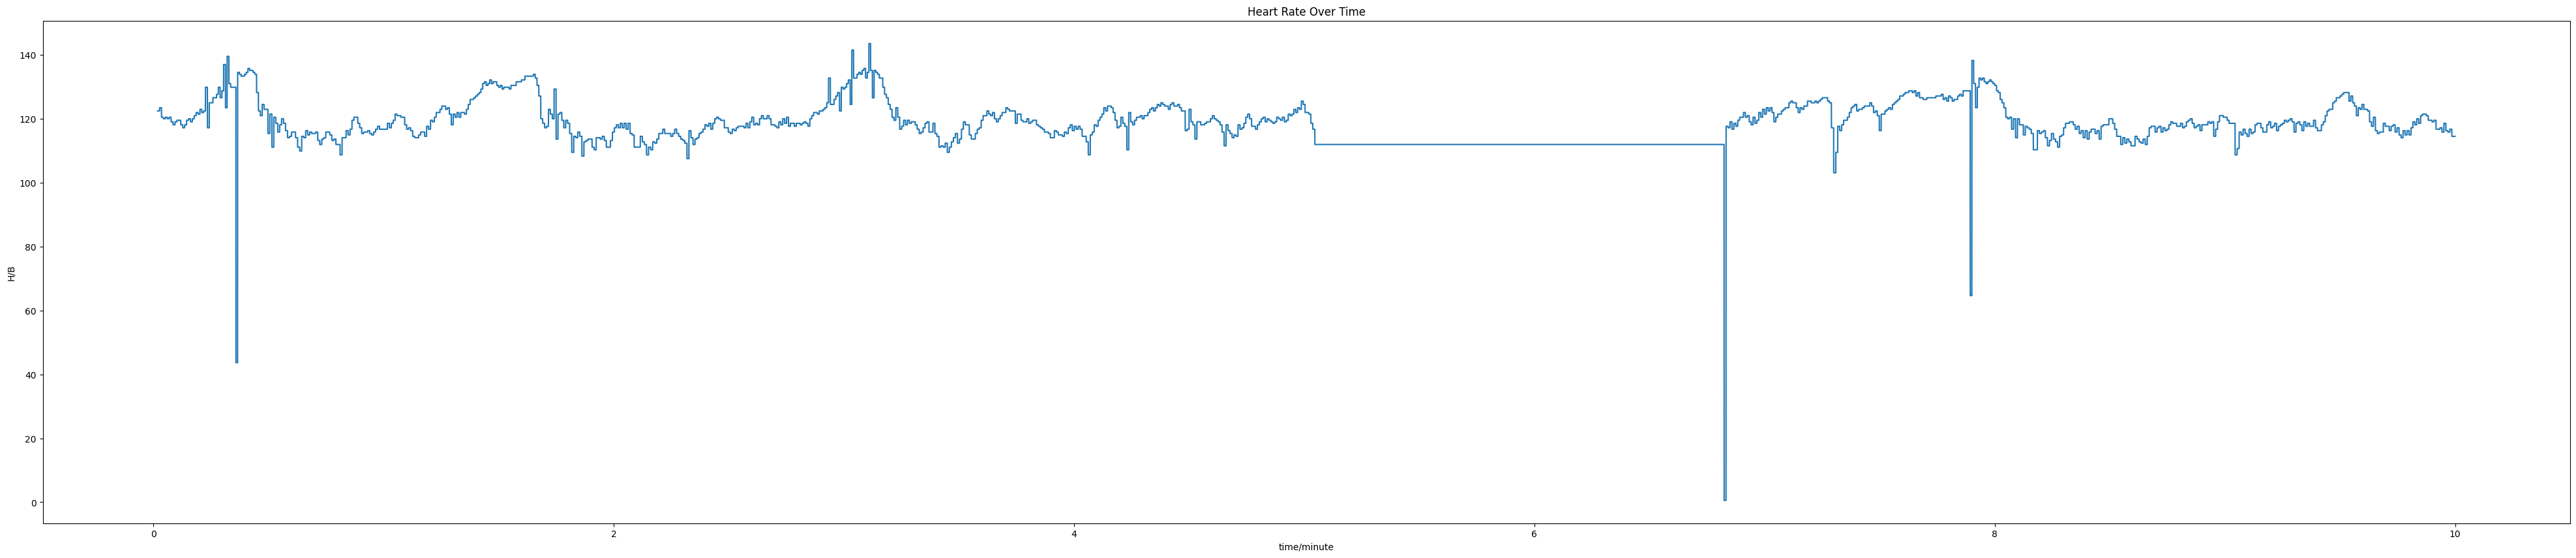

Frequency:500, Signal Length: 300000, Start Time: 10.0 mins, End Time: 20.0 mins


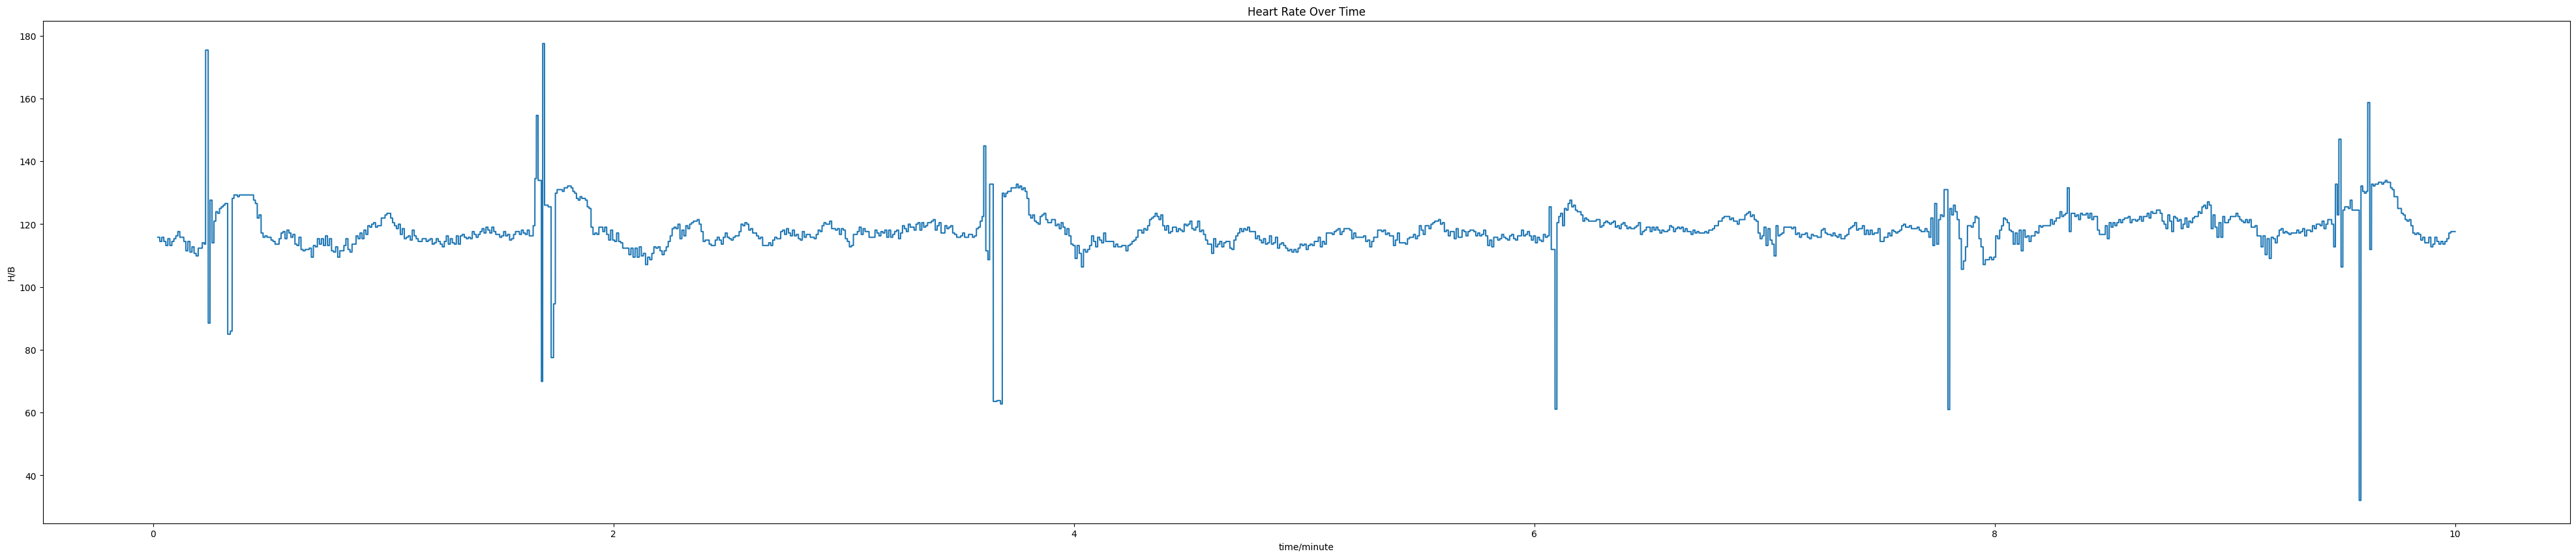

Frequency:500, Signal Length: 300000, Start Time: 20.0 mins, End Time: 30.0 mins


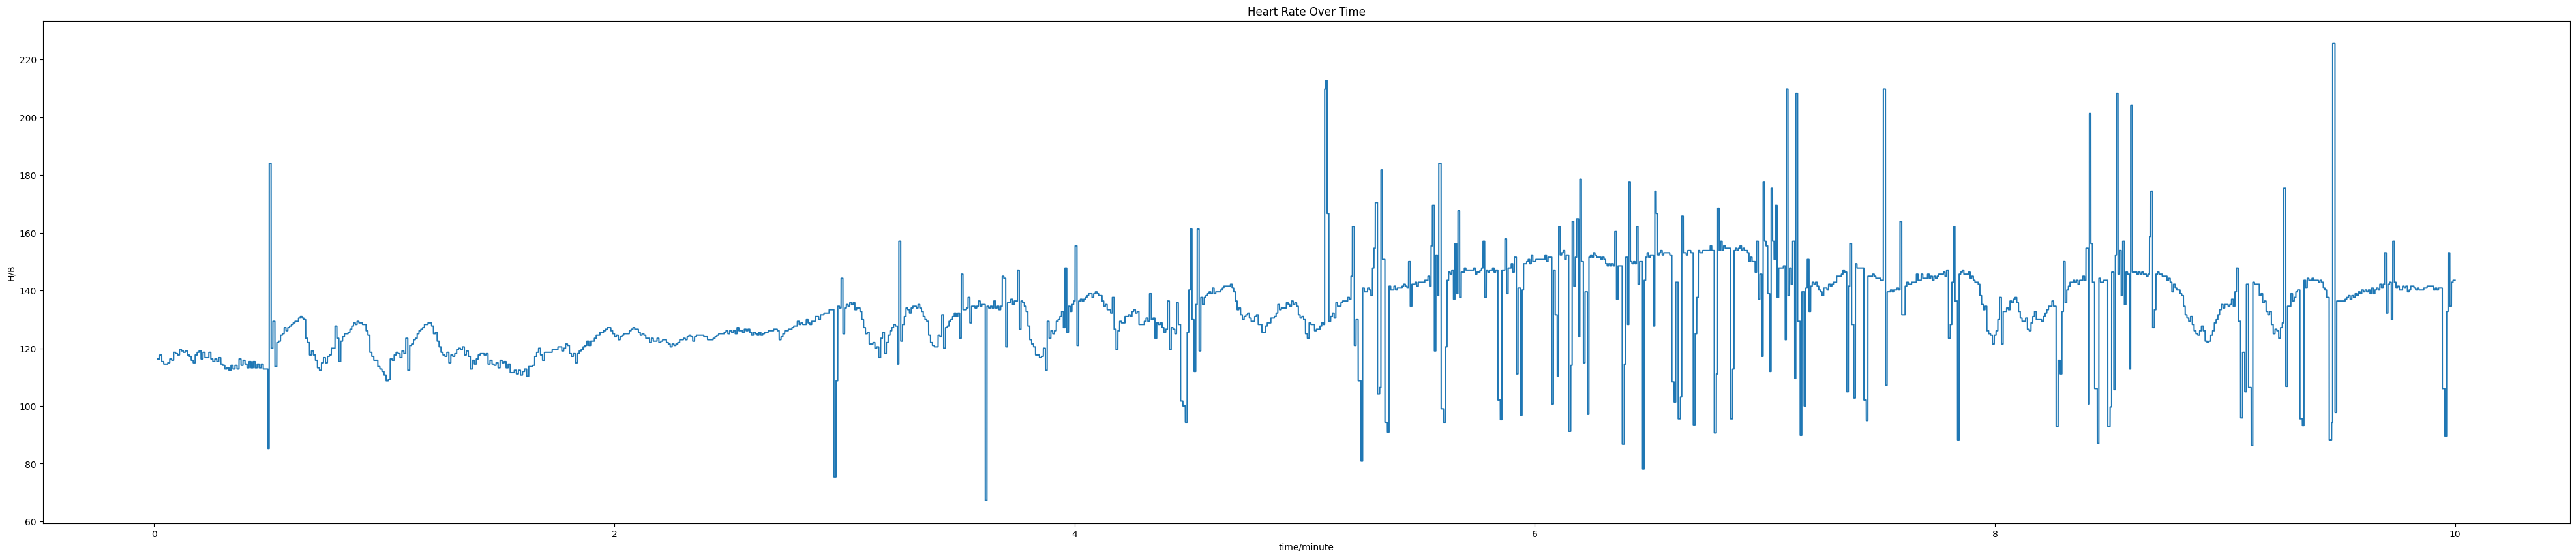

Frequency:500, Signal Length: 300000, Start Time: 30.0 mins, End Time: 40.0 mins


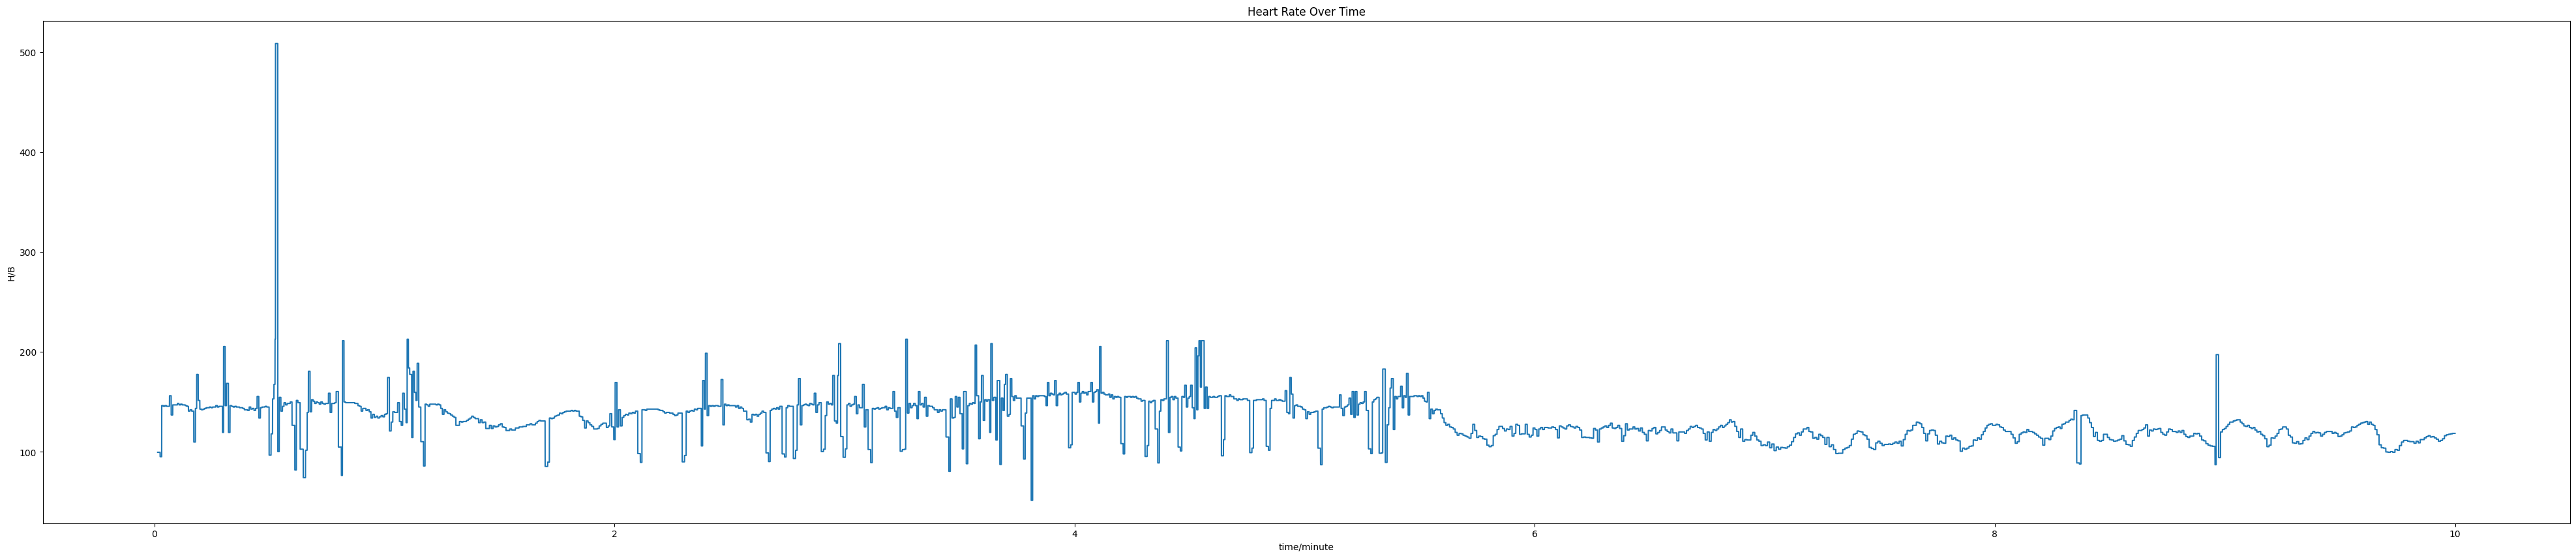

Frequency:500, Signal Length: 300000, Start Time: 40.0 mins, End Time: 50.0 mins


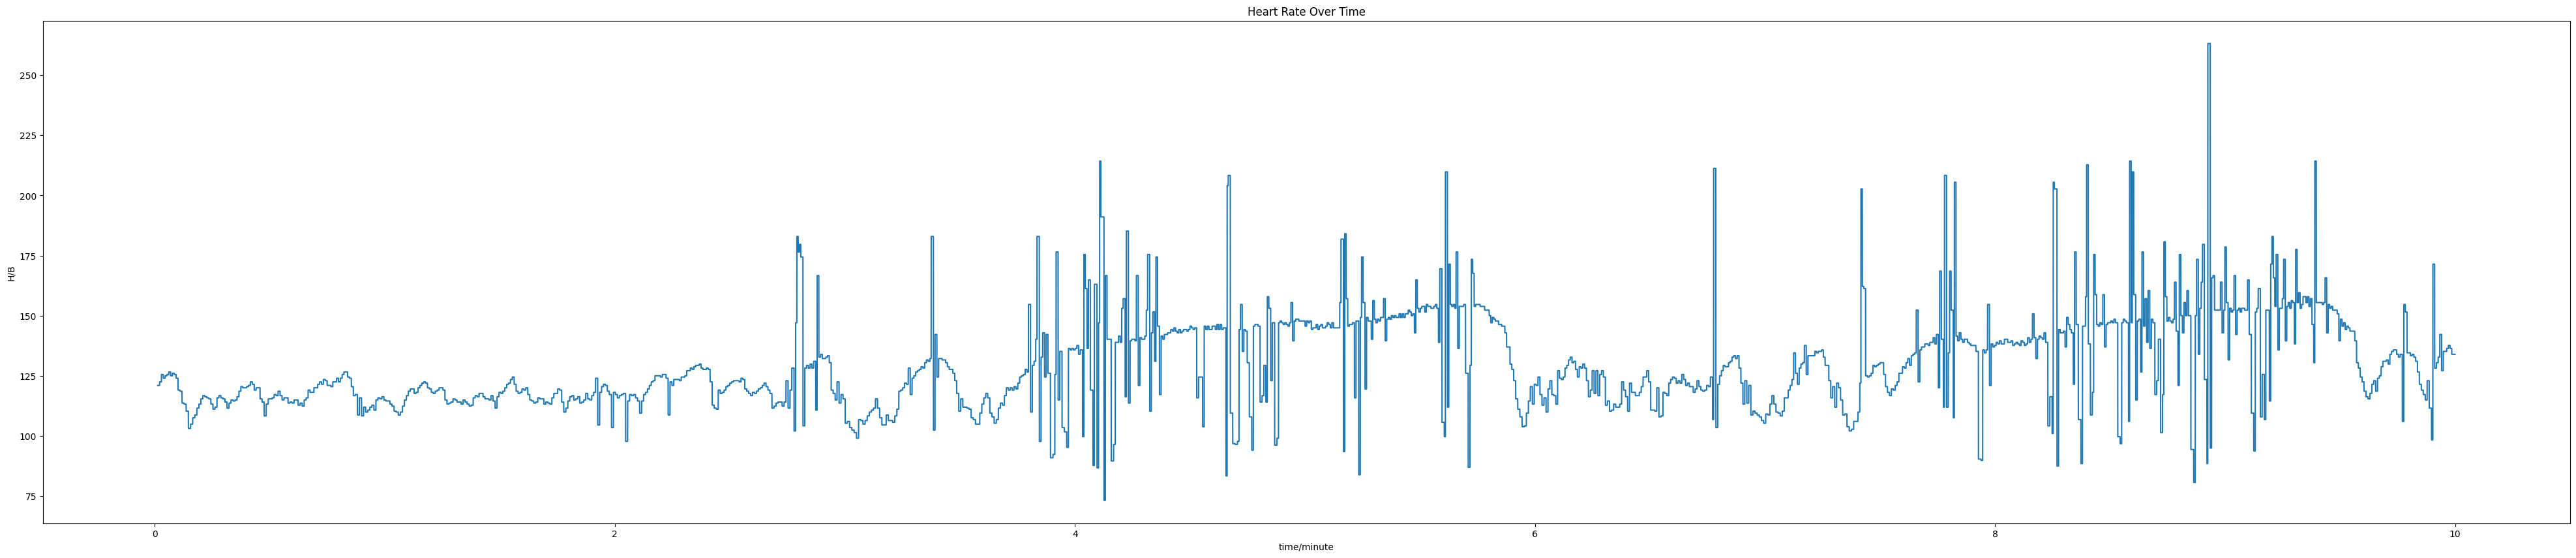

Frequency:500, Signal Length: 300000, Start Time: 50.0 mins, End Time: 60.0 mins


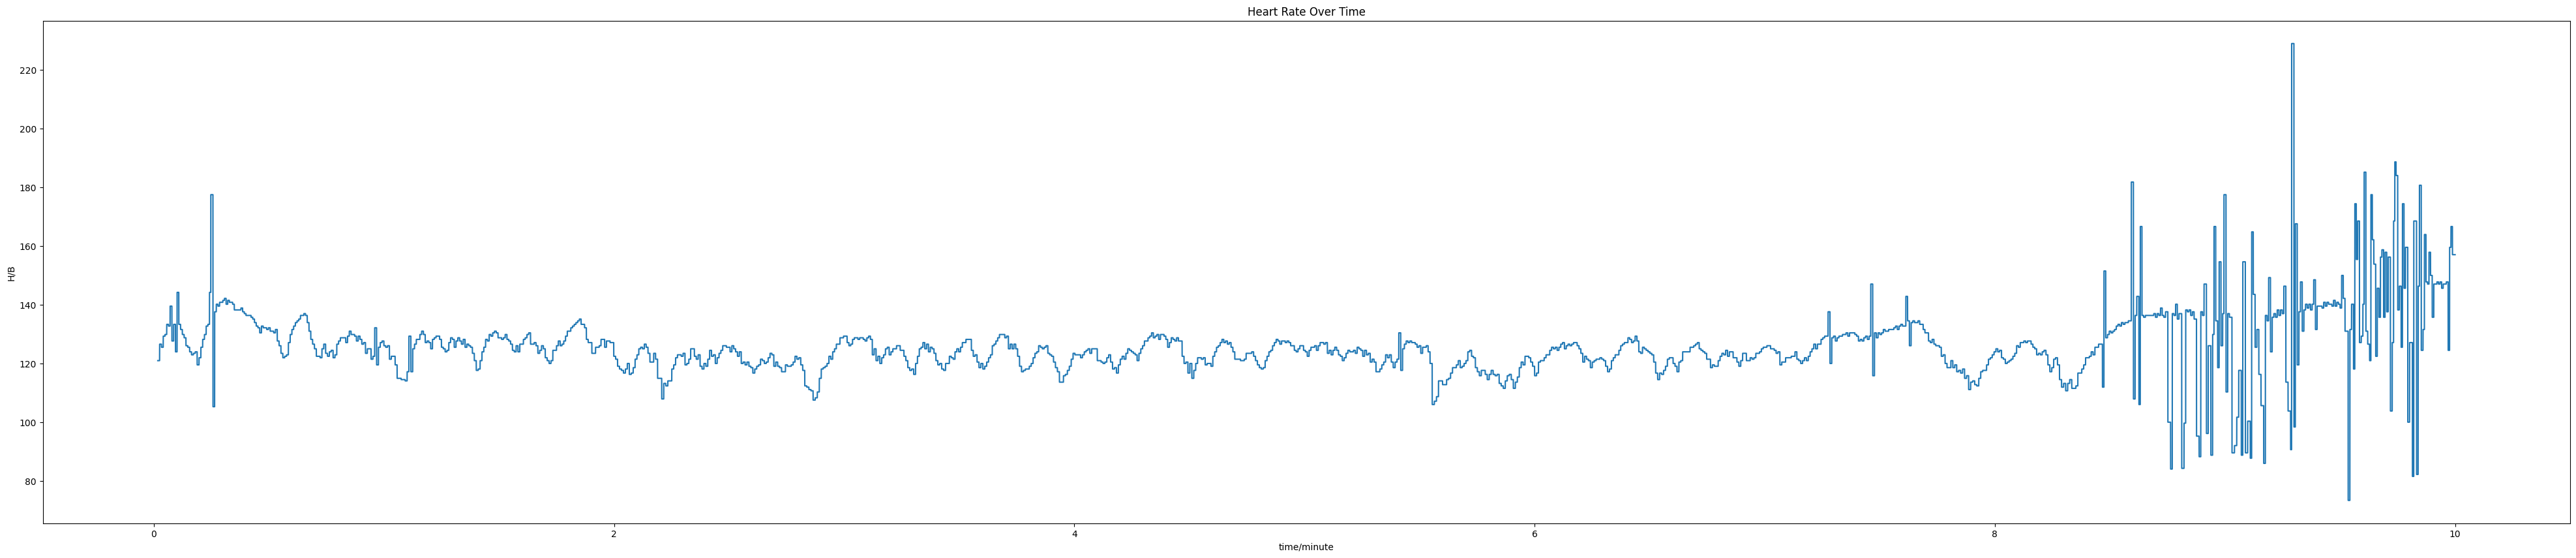

Frequency:500, Signal Length: 300000, Start Time: 60.0 mins, End Time: 70.0 mins


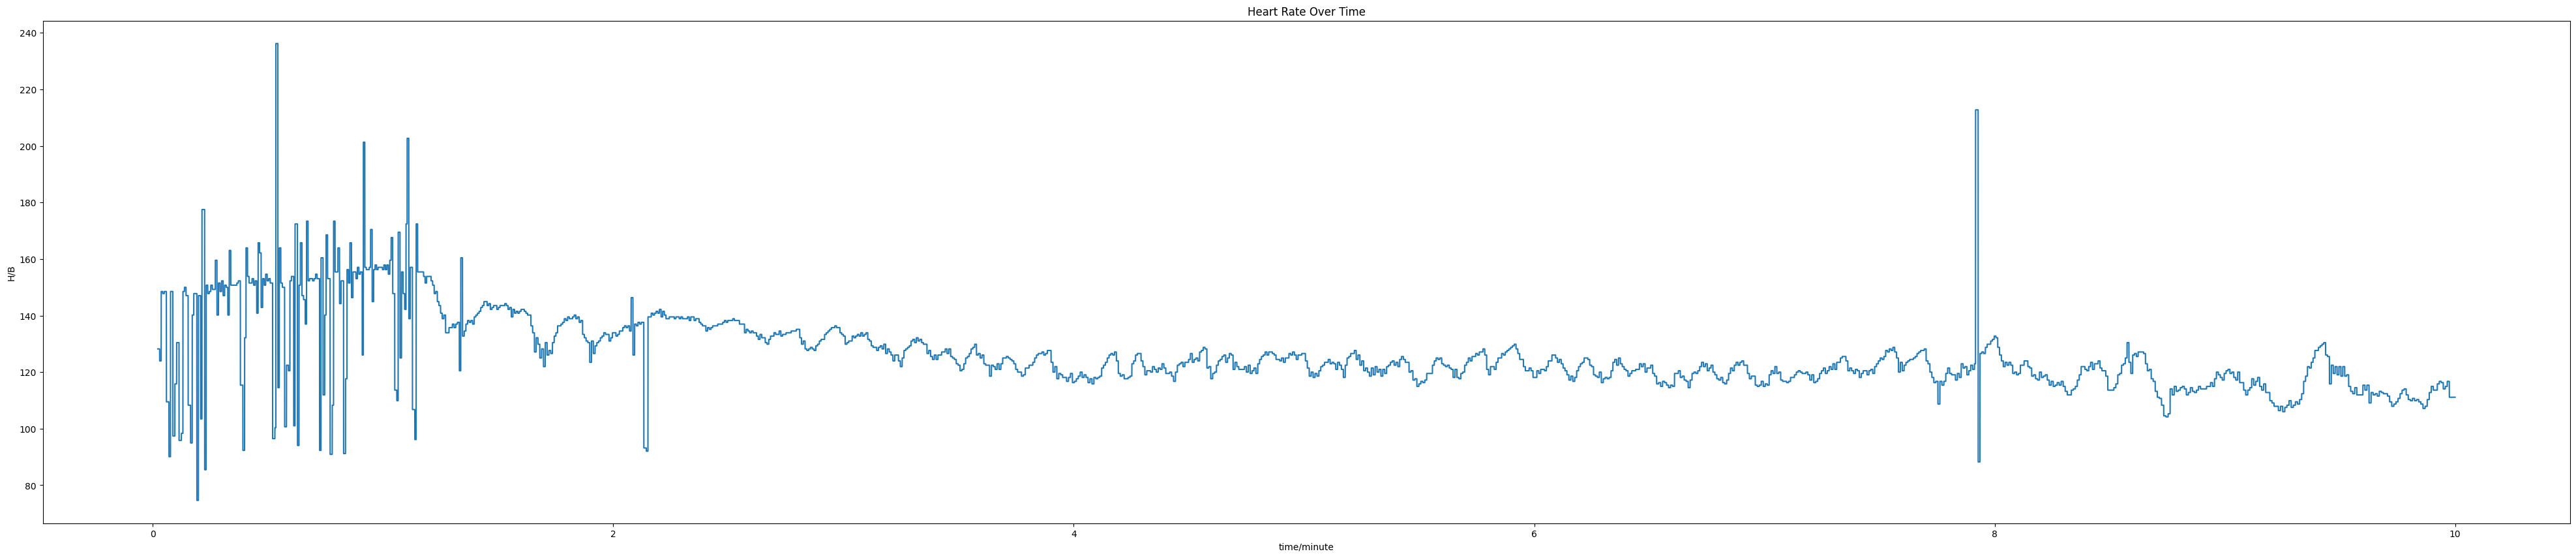

Frequency:500, Signal Length: 300000, Start Time: 70.0 mins, End Time: 80.0 mins


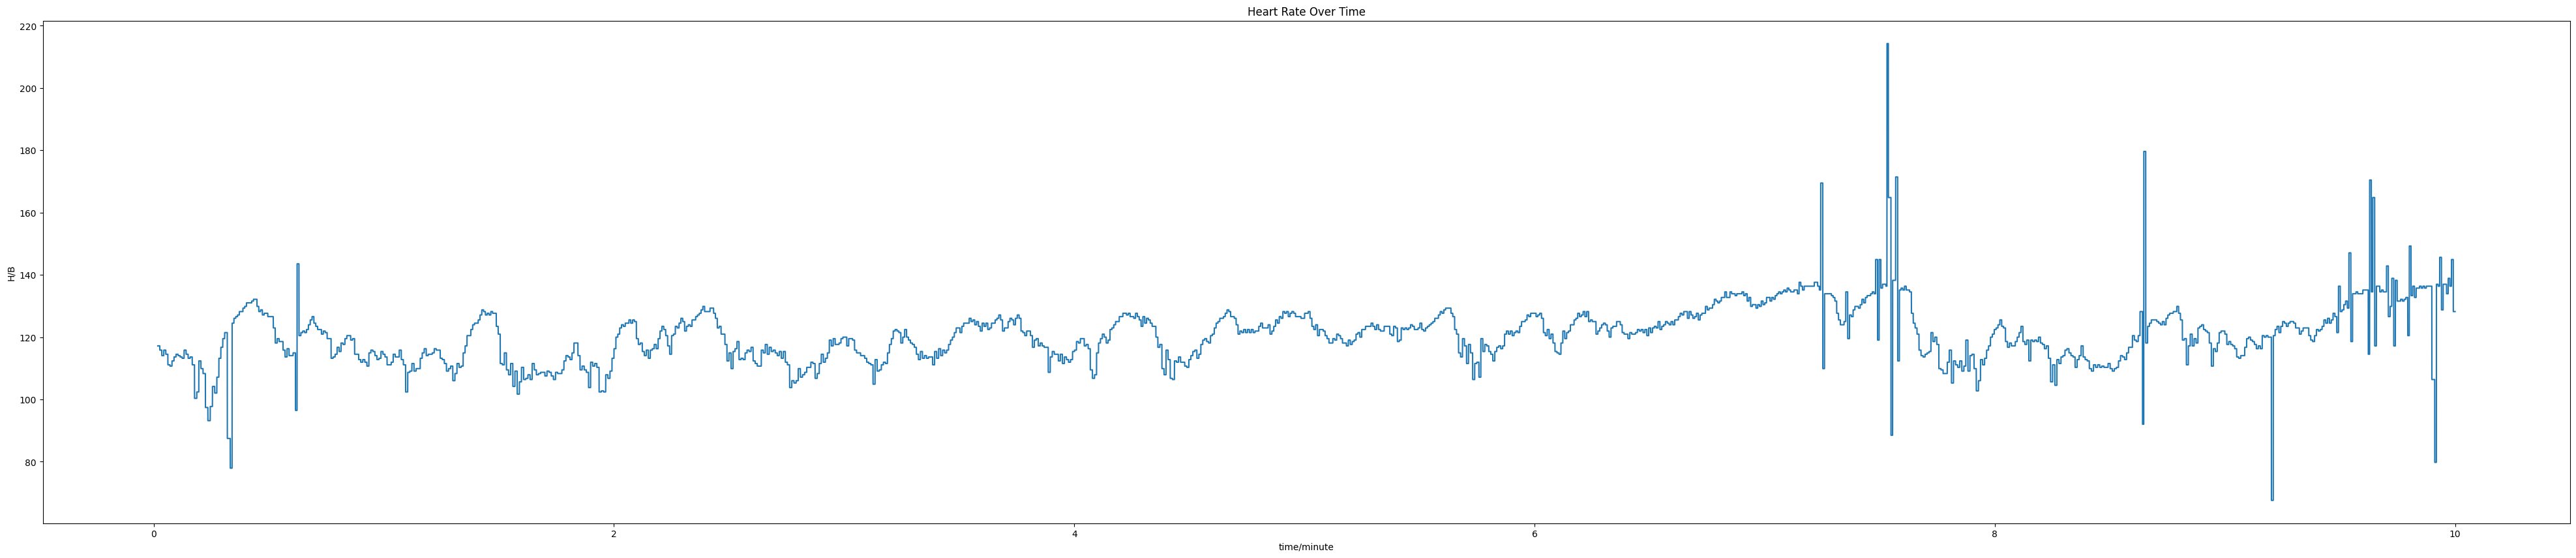

Frequency:500, Signal Length: 300000, Start Time: 80.0 mins, End Time: 90.0 mins


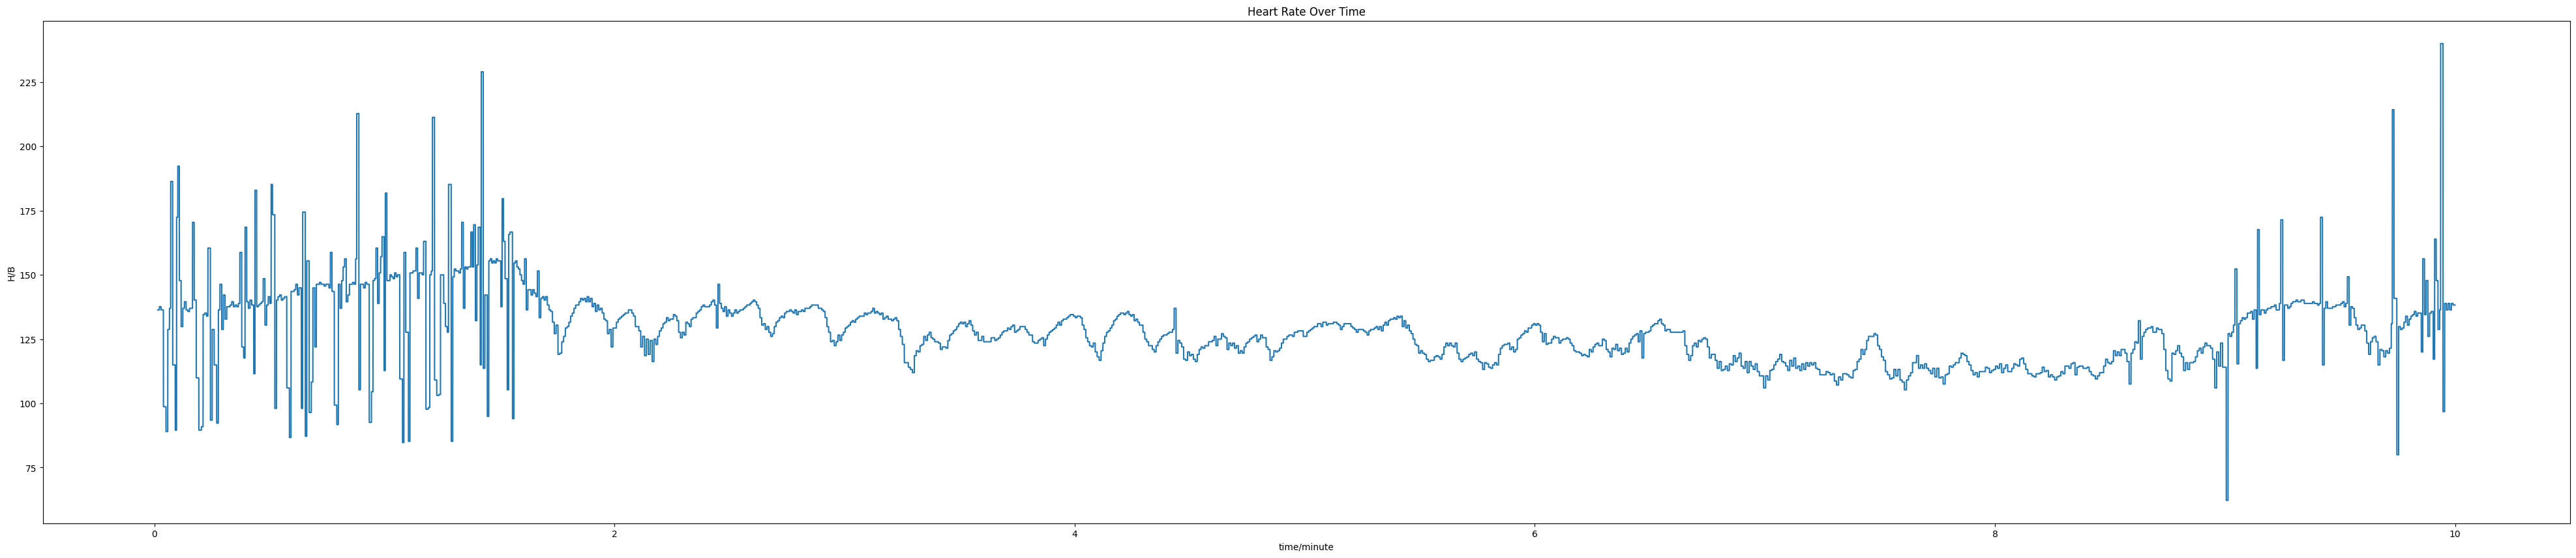

Frequency:500, Signal Length: 300000, Start Time: 90.0 mins, End Time: 100.0 mins


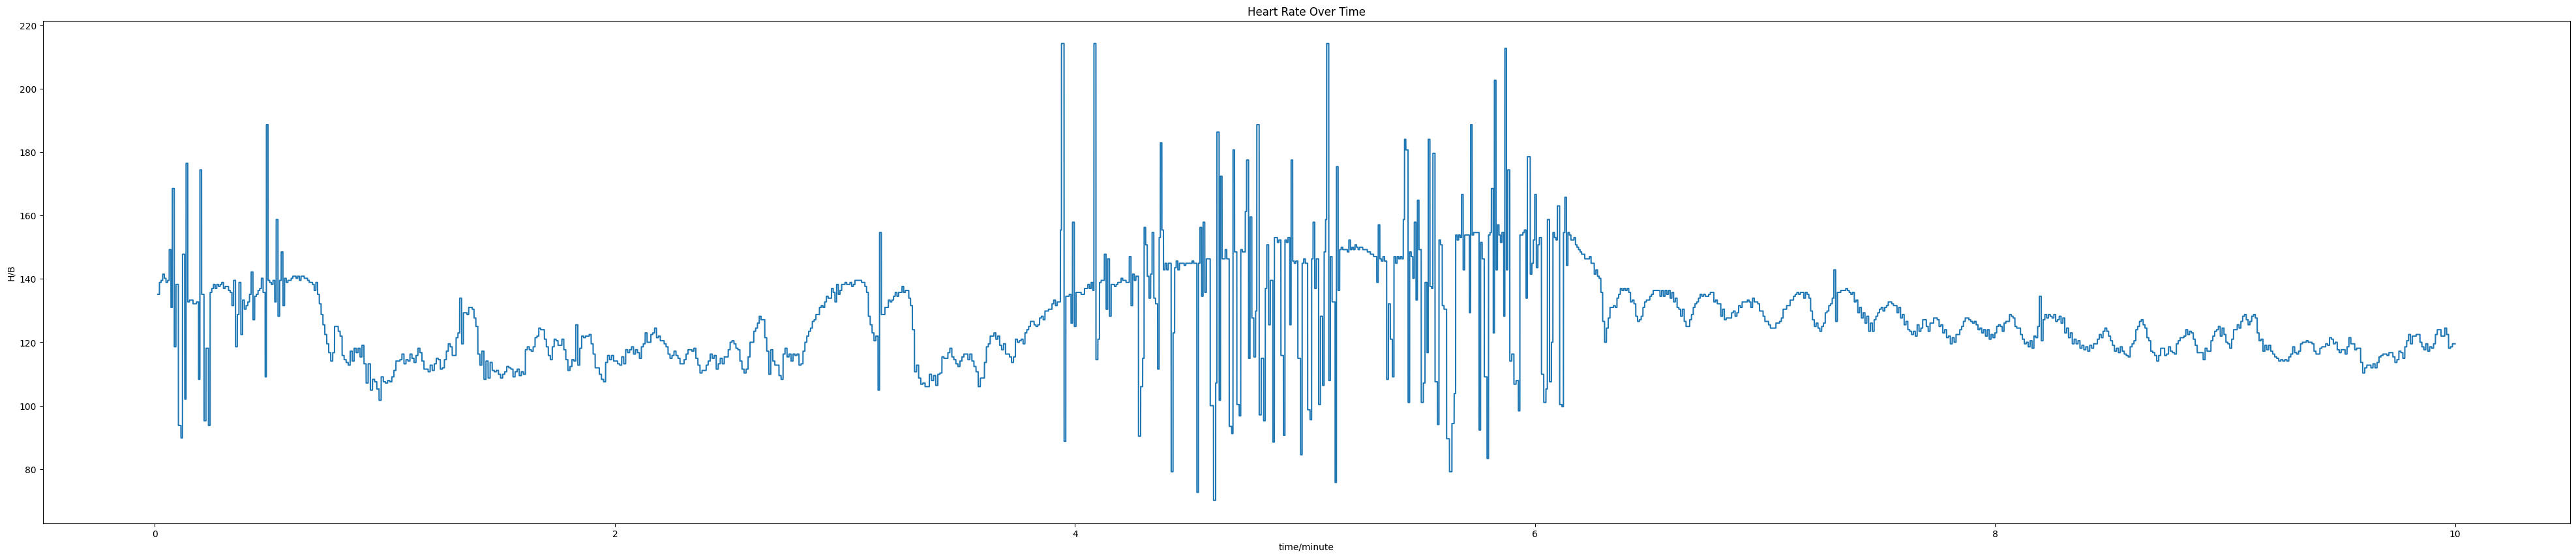

In [171]:
# Calculate heart rate
for i in range(0,10,1):
    duration = 300000 # 10 mins 
    startNum = duration*i
    endNum = duration*(i+1)
    signals_ecg = wfdb.rdsamp(f"{data_dir}/infant2_ecg", sampfrom=startNum, sampto=endNum)
    record_ecg = wfdb.rdrecord(f"{data_dir}/infant2_ecg", sampfrom=startNum, sampto=endNum)
    annotation_ecg = wfdb.rdann(f"{data_dir}/infant2_ecg", 'qrsc', sampfrom=startNum, sampto=endNum, shift_samps=True)
    startTime = (startNum/record_ecg.fs)/60
    endTime = (endNum/record_ecg.fs)/60
    print(f"Frequency:{record_ecg.fs}, Signal Length: {record_ecg.sig_len}, Start Time: {startTime} mins, End Time: {endTime} mins")
    qrs_inds = processing.qrs.gqrs_detect(sig=signals_ecg[0], fs=record.fs)
    signals_heartrate = processing.hr.compute_hr(sig_len=record_ecg.p_signal.shape[0], qrs_inds=qrs_inds, fs=record_ecg.fs)
    wfdb.plot_items(signal=signals_heartrate, 
                    fs=record_ecg.fs, 
                    time_units='minutes', 
                    sig_name='Heart Rate', 
                    sig_units='Beats per Minute', 
                    title='Heart Rate Over Time', 
                    figsize=(50,10))

In [131]:
# Calculate mean heart rate 
# obtain RR interval from Annotation
startNum = 300000*0
endNum = 300000*1
record_ecg = wfdb.rdrecord(f"{data_dir}/infant2_ecg", sampfrom=startNum, sampto=endNum)
startTime = (startNum/record_ecg.fs)/60
endTime = (endNum/record_ecg.fs)/60
signals_ecg_rr = processing.ann2rr(f"{data_dir}/infant2_ecg", 'qrsc', start_time=0, stop_time=600)
print(f"Frequency:{record_ecg.fs}, Signal Length: {record_ecg.sig_len}, Start Time: {startTime} mins, End Time: {endTime} mins")
print(signals_ecg_rr.shape)
print(signals_ecg[0].shape)
mean_hr = processing.calc_mean_hr(signals_ecg_rr, fs=record_ecg.fs)
print(mean_hr)

Frequency:500, Signal Length: 300000, Start Time: 0.0 mins, End Time: 10.0 mins
(333602,)
(300000, 1)
128.11623790612623


Frequency:50, Signal Length: 3000, Start Time: 0.0 mins, End Time: 1.0 mins
{'fs': 50, 'sig_len': 3000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


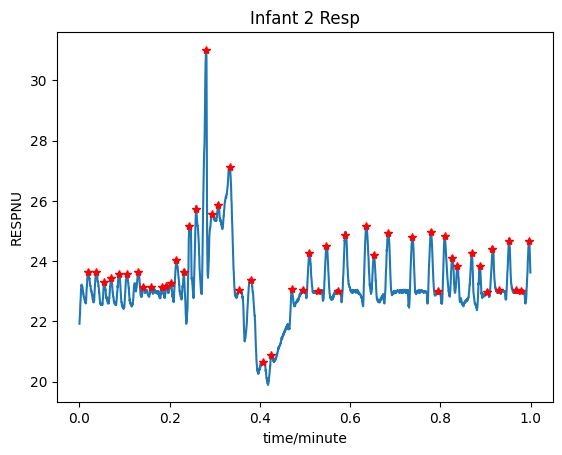

In [178]:
duration = 30000 # 10 mins 
kth = 0
startNum = duration*kth
endNum = duration*(kth+1)
signals_resp = wfdb.rdsamp(f"{data_dir}/infant2_resp", sampfrom=startNum, sampto=endNum)
record_resp = wfdb.rdrecord(f"{data_dir}/infant2_resp", sampfrom=startNum, sampto=endNum)
annotation_resp = wfdb.rdann(f"{data_dir}/infant2_resp", 'resp', sampfrom=startNum, sampto=endNum)
startTime = (startNum/record_resp.fs)/60
endTime = (endNum/record_resp.fs)/60
print(f"Frequency:{record_resp.fs}, Signal Length: {record_resp.sig_len}, Start Time: {startTime} mins, End Time: {endTime} mins")
print(signals_resp[1])
# print(annotation_resp.chan)
wfdb.plot_wfdb(record=record_resp, annotation=annotation_resp,
               title='Infant 2 Resp',
               time_units='minutes')


Frequency:50, Signal Length: 30000, Start Time: 0.0 mins, End Time: 10.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


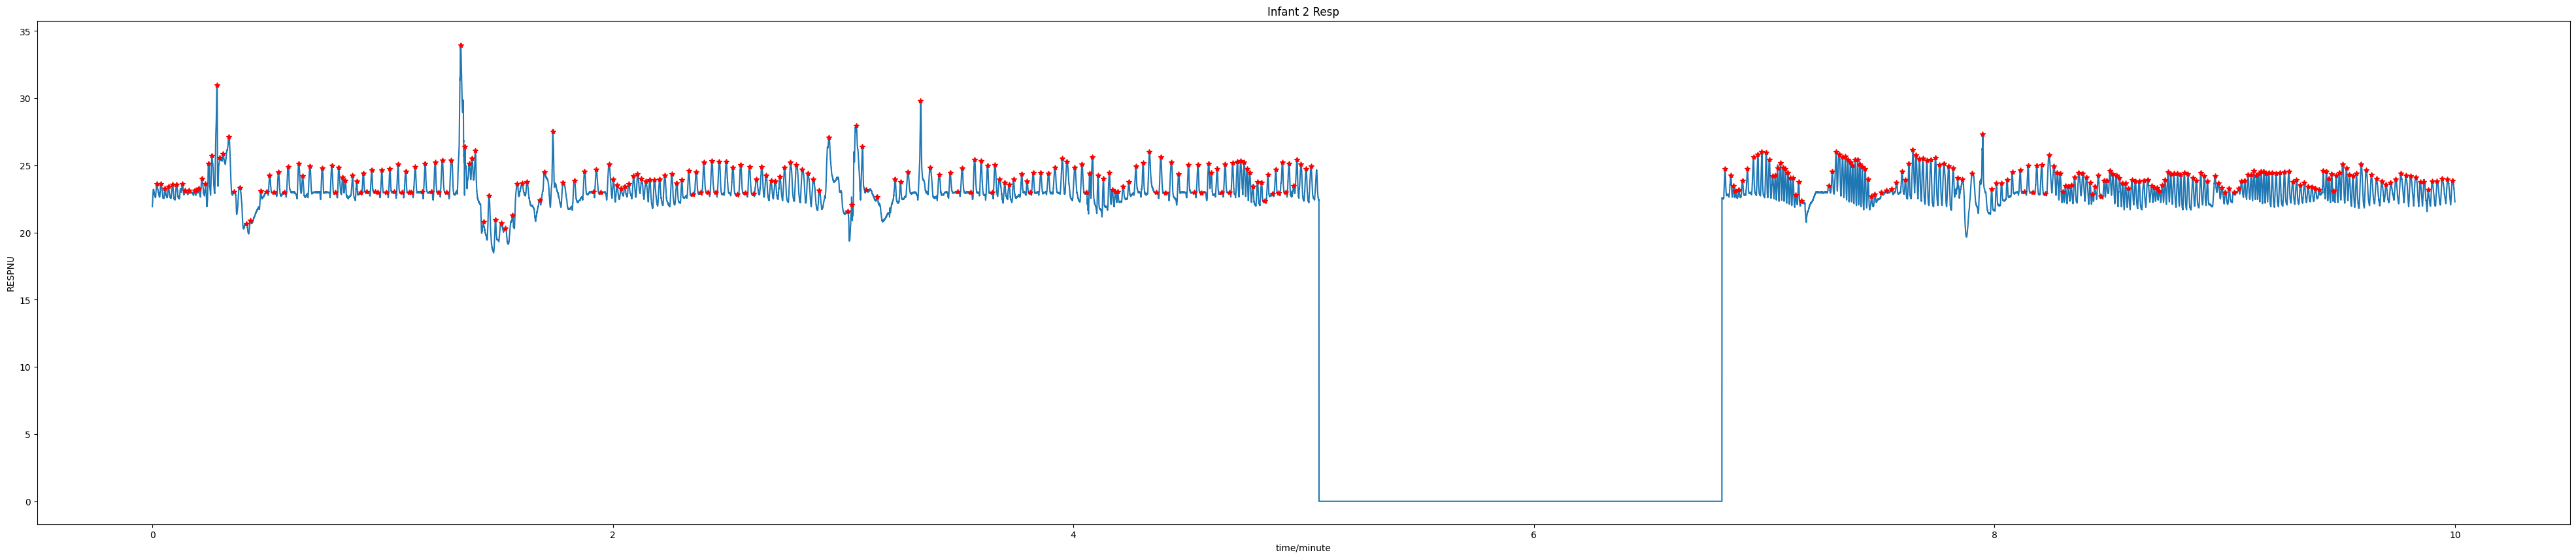

Frequency:50, Signal Length: 30000, Start Time: 10.0 mins, End Time: 20.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


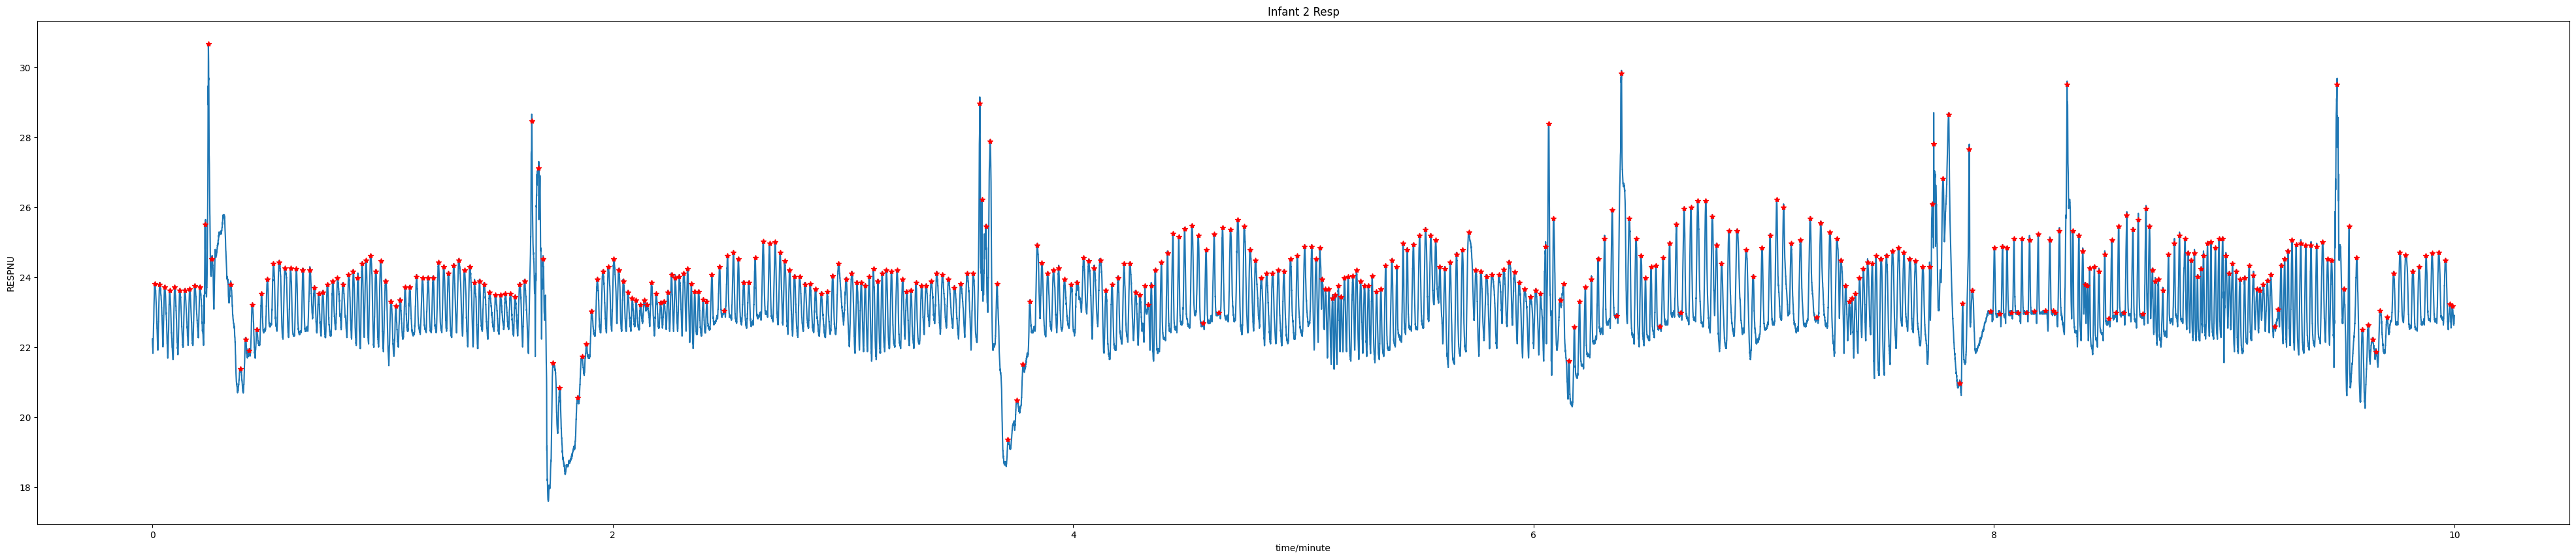

Frequency:50, Signal Length: 30000, Start Time: 20.0 mins, End Time: 30.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


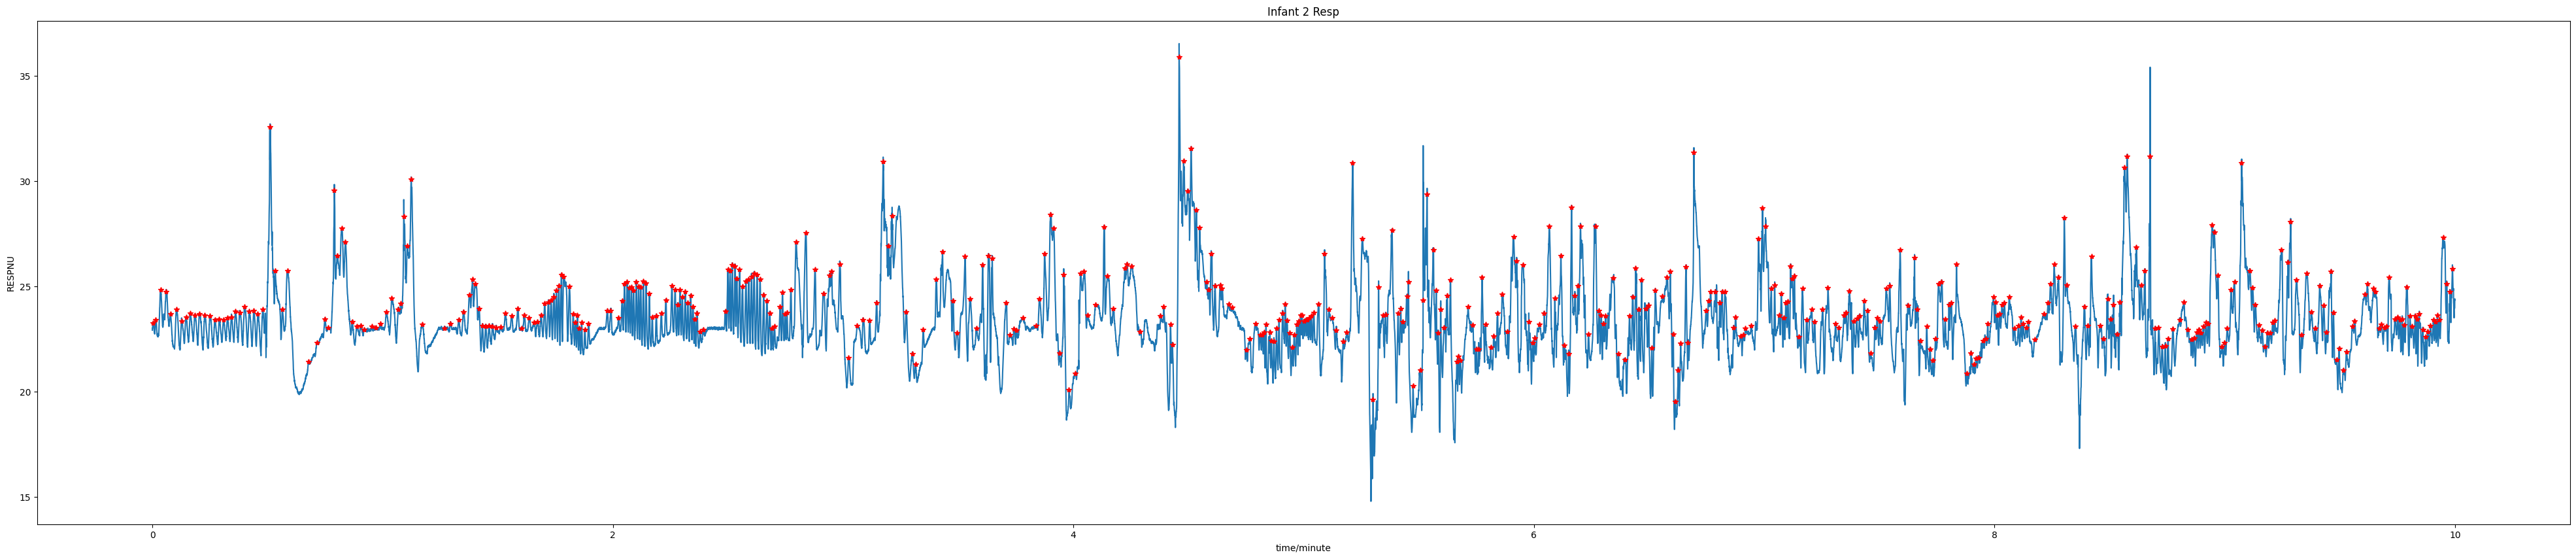

Frequency:50, Signal Length: 30000, Start Time: 30.0 mins, End Time: 40.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


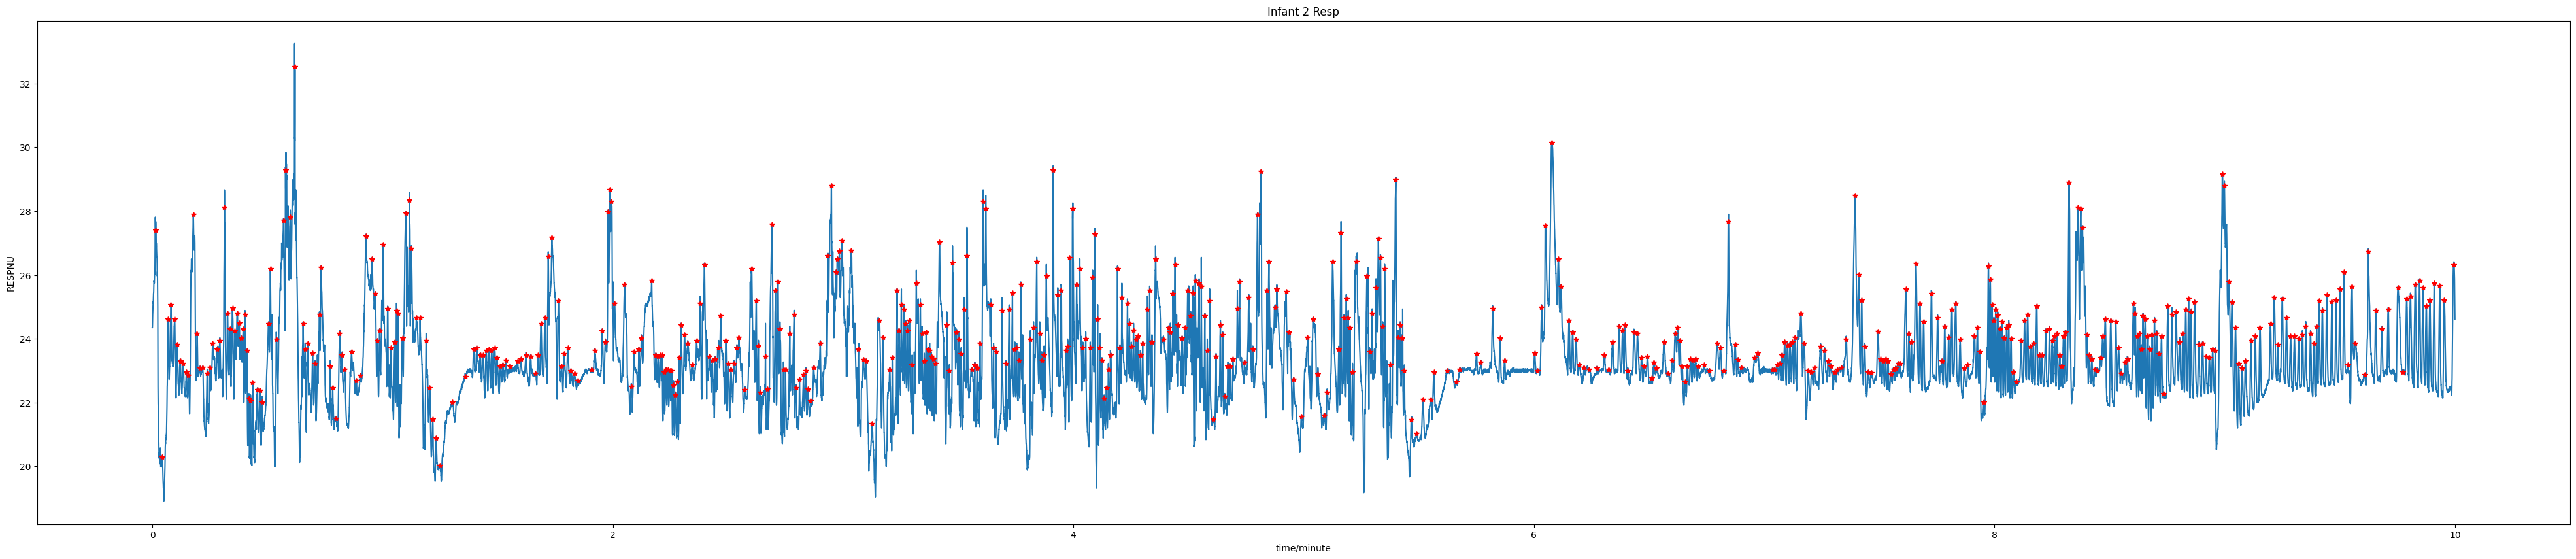

Frequency:50, Signal Length: 30000, Start Time: 40.0 mins, End Time: 50.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


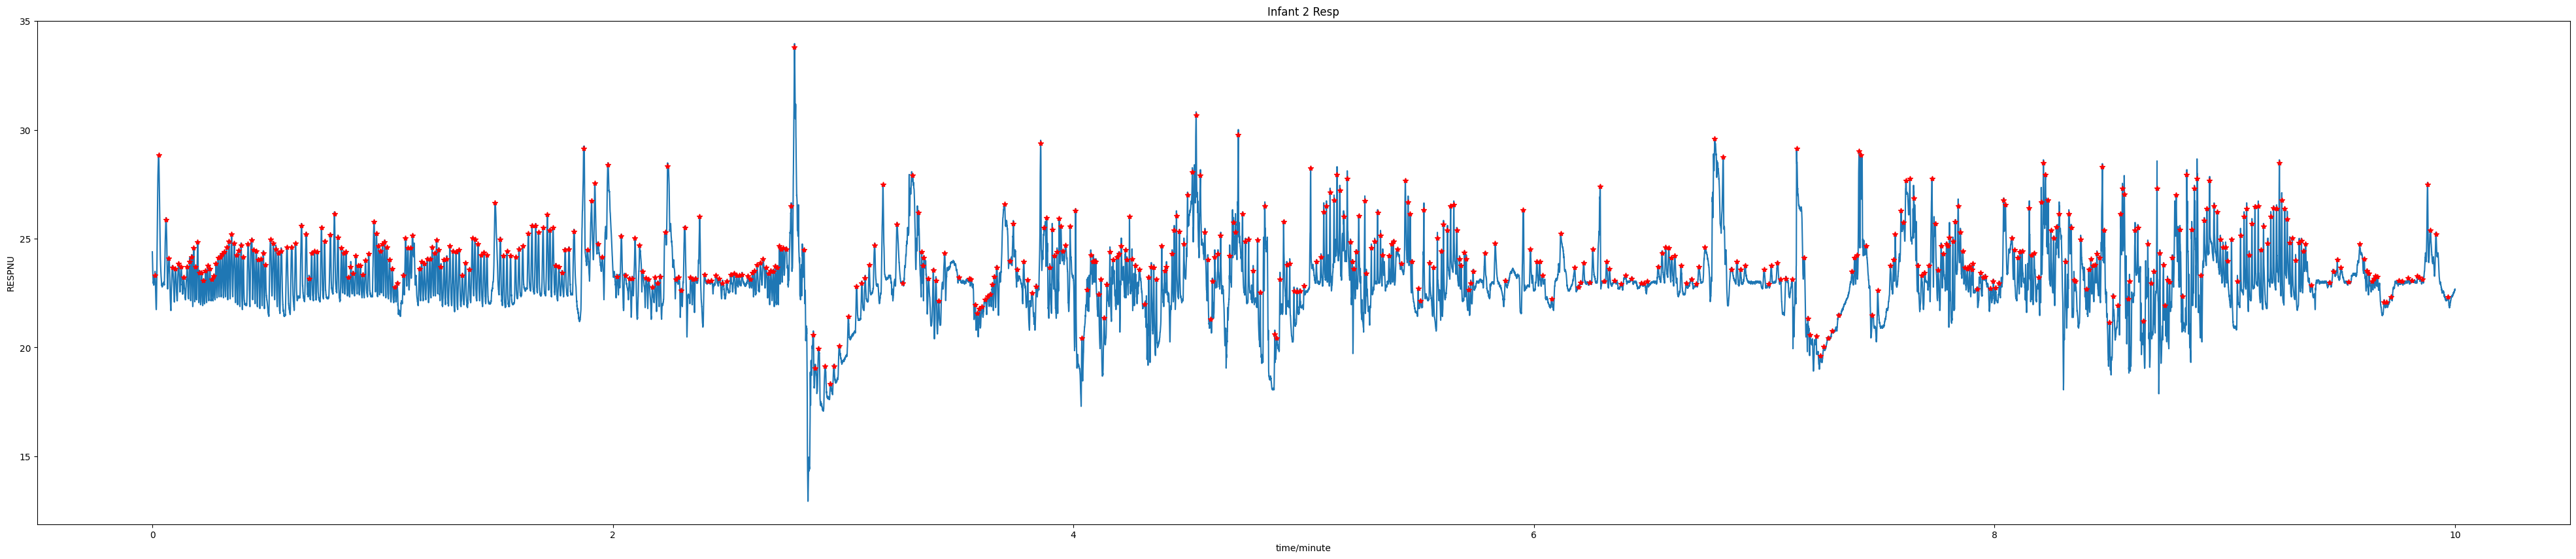

Frequency:50, Signal Length: 30000, Start Time: 50.0 mins, End Time: 60.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


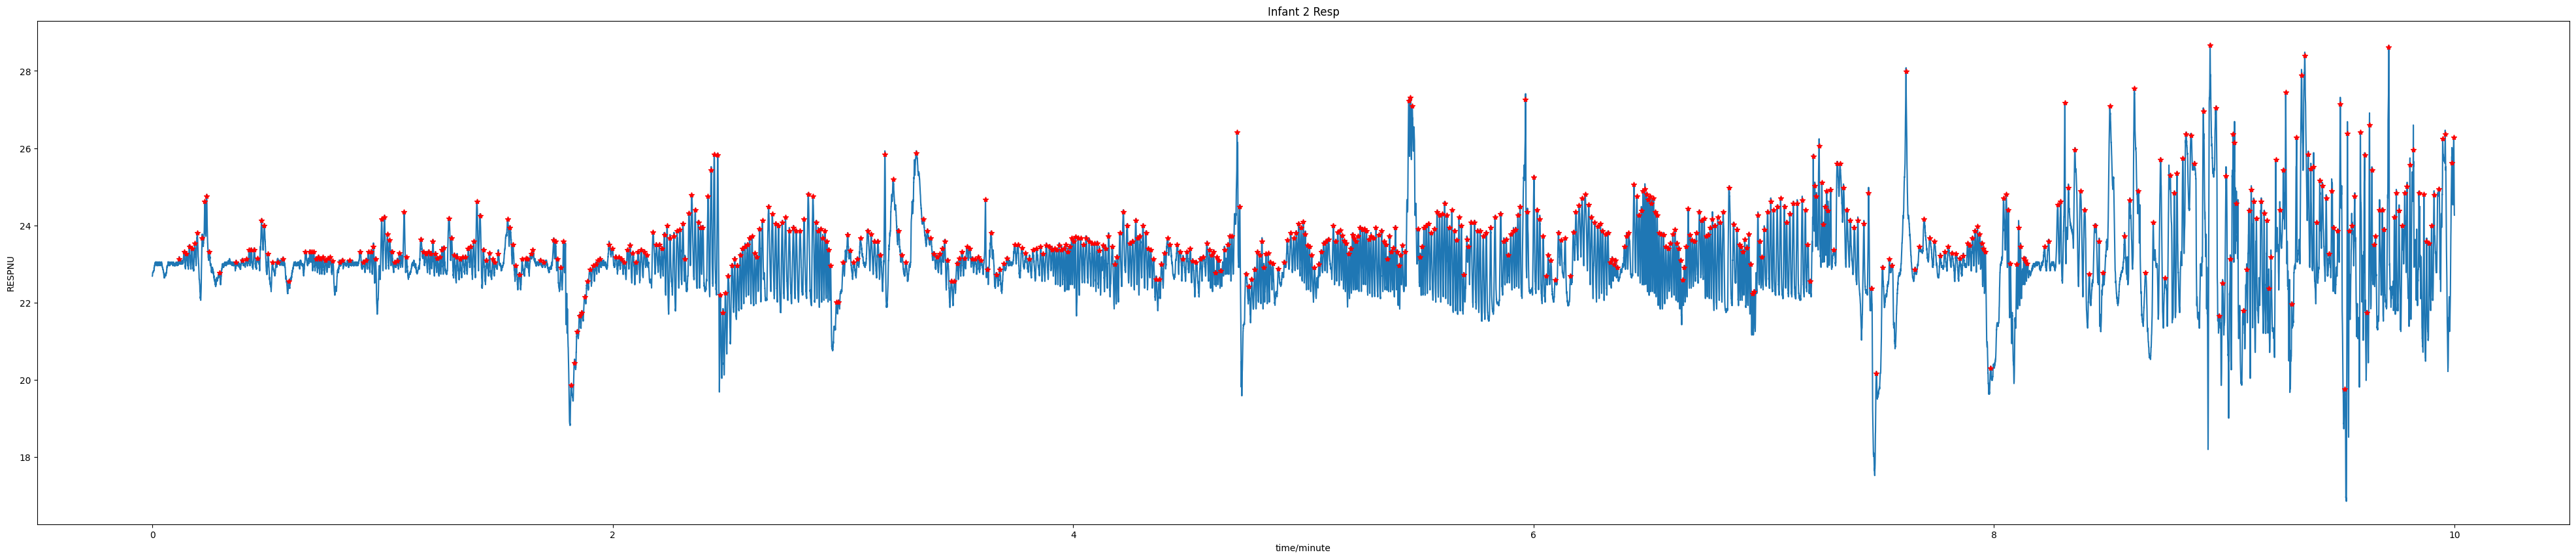

Frequency:50, Signal Length: 30000, Start Time: 60.0 mins, End Time: 70.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


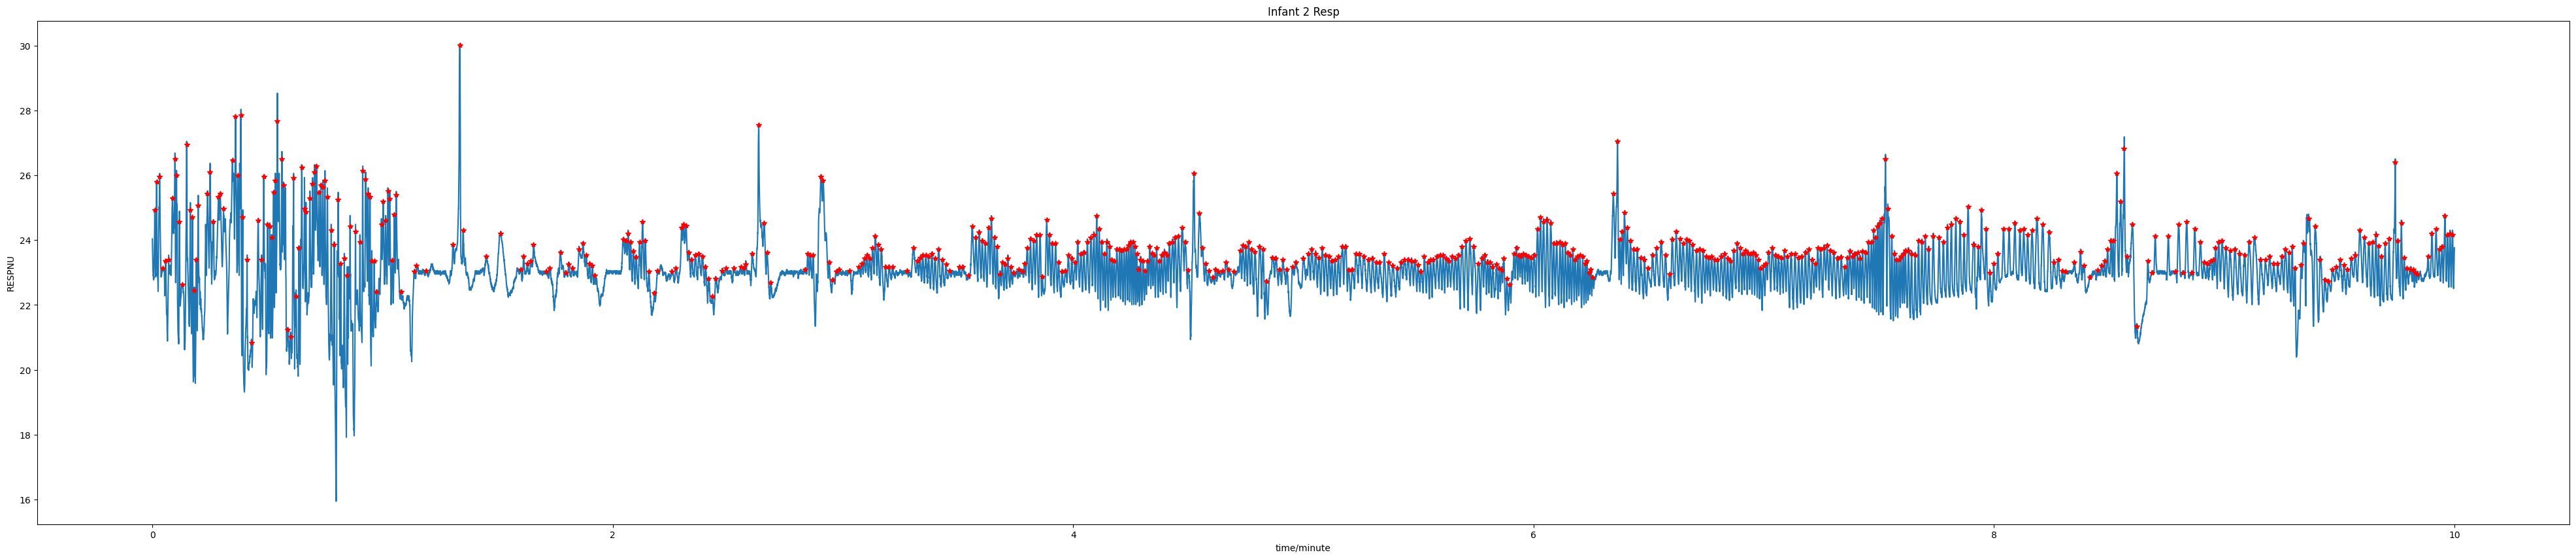

Frequency:50, Signal Length: 30000, Start Time: 70.0 mins, End Time: 80.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


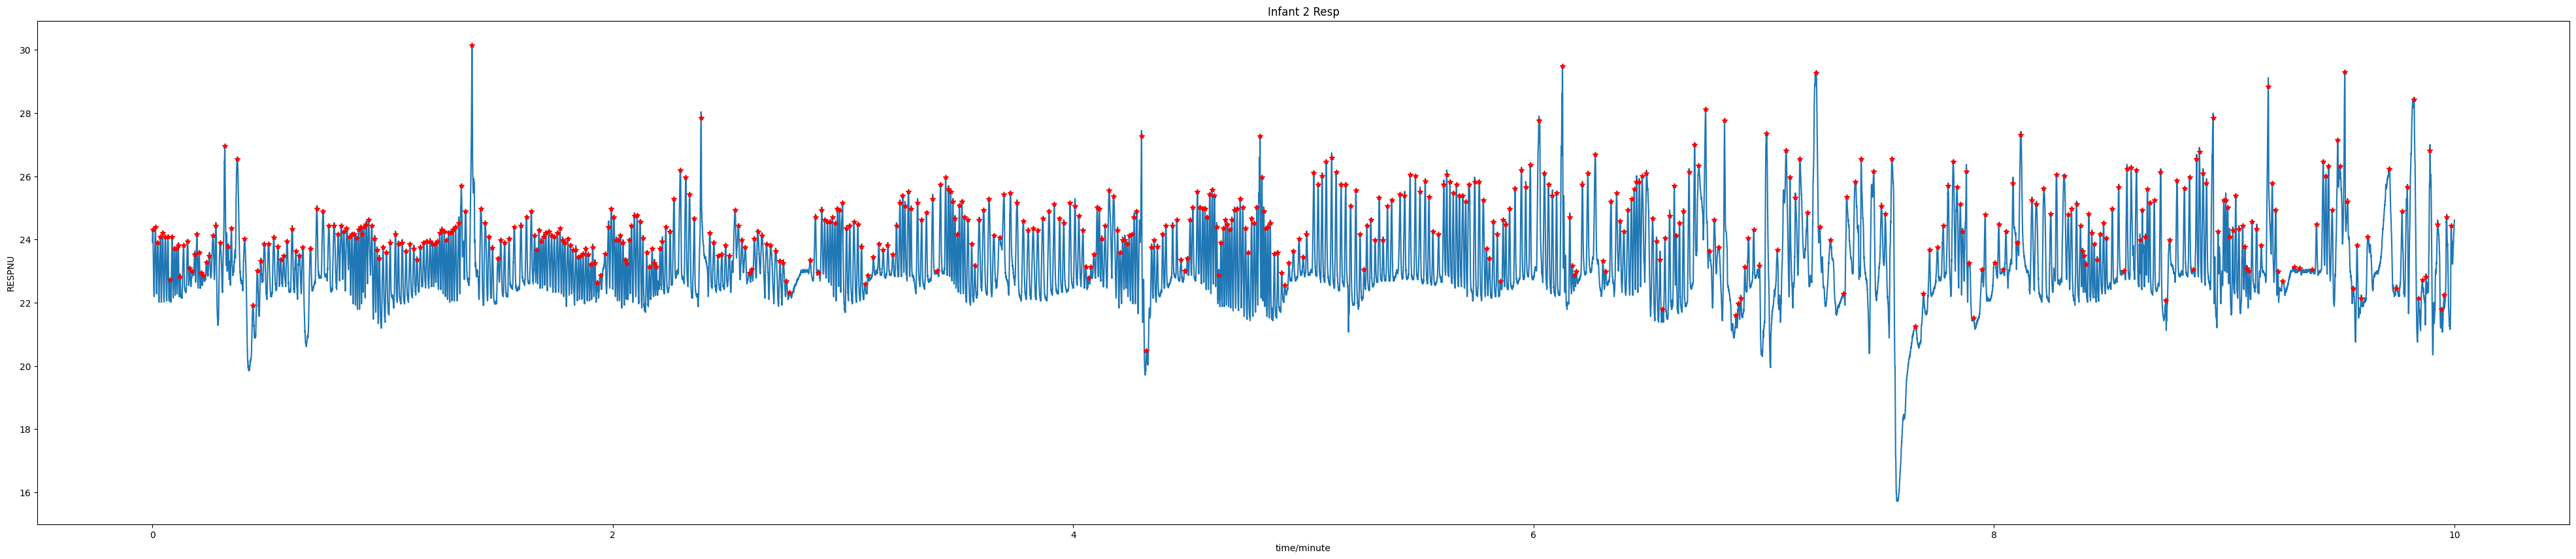

Frequency:50, Signal Length: 30000, Start Time: 80.0 mins, End Time: 90.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


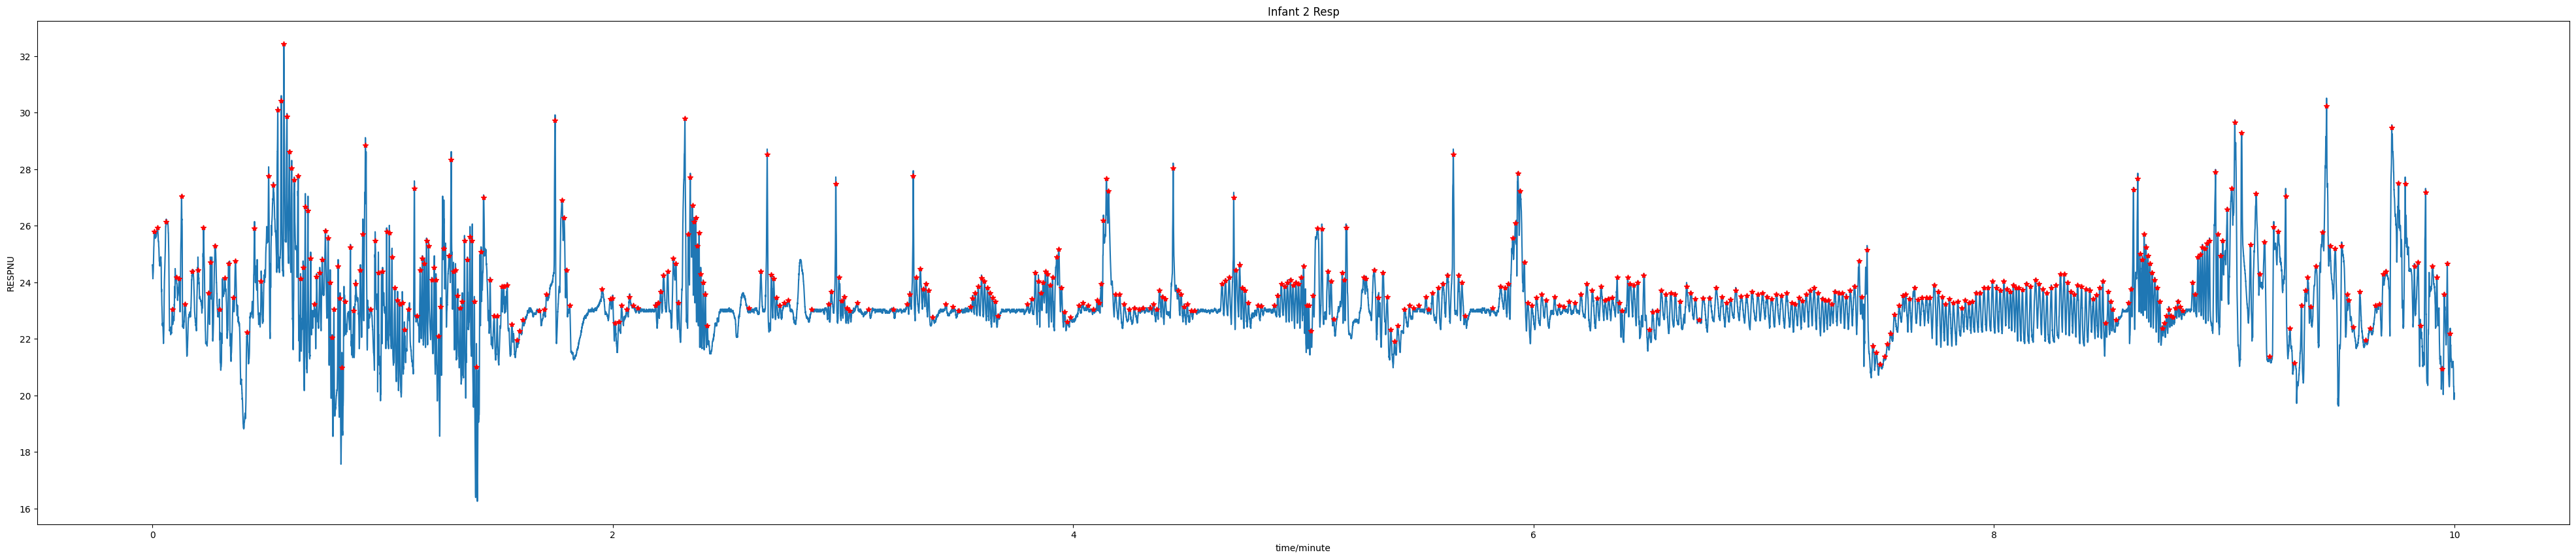

Frequency:50, Signal Length: 30000, Start Time: 90.0 mins, End Time: 100.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


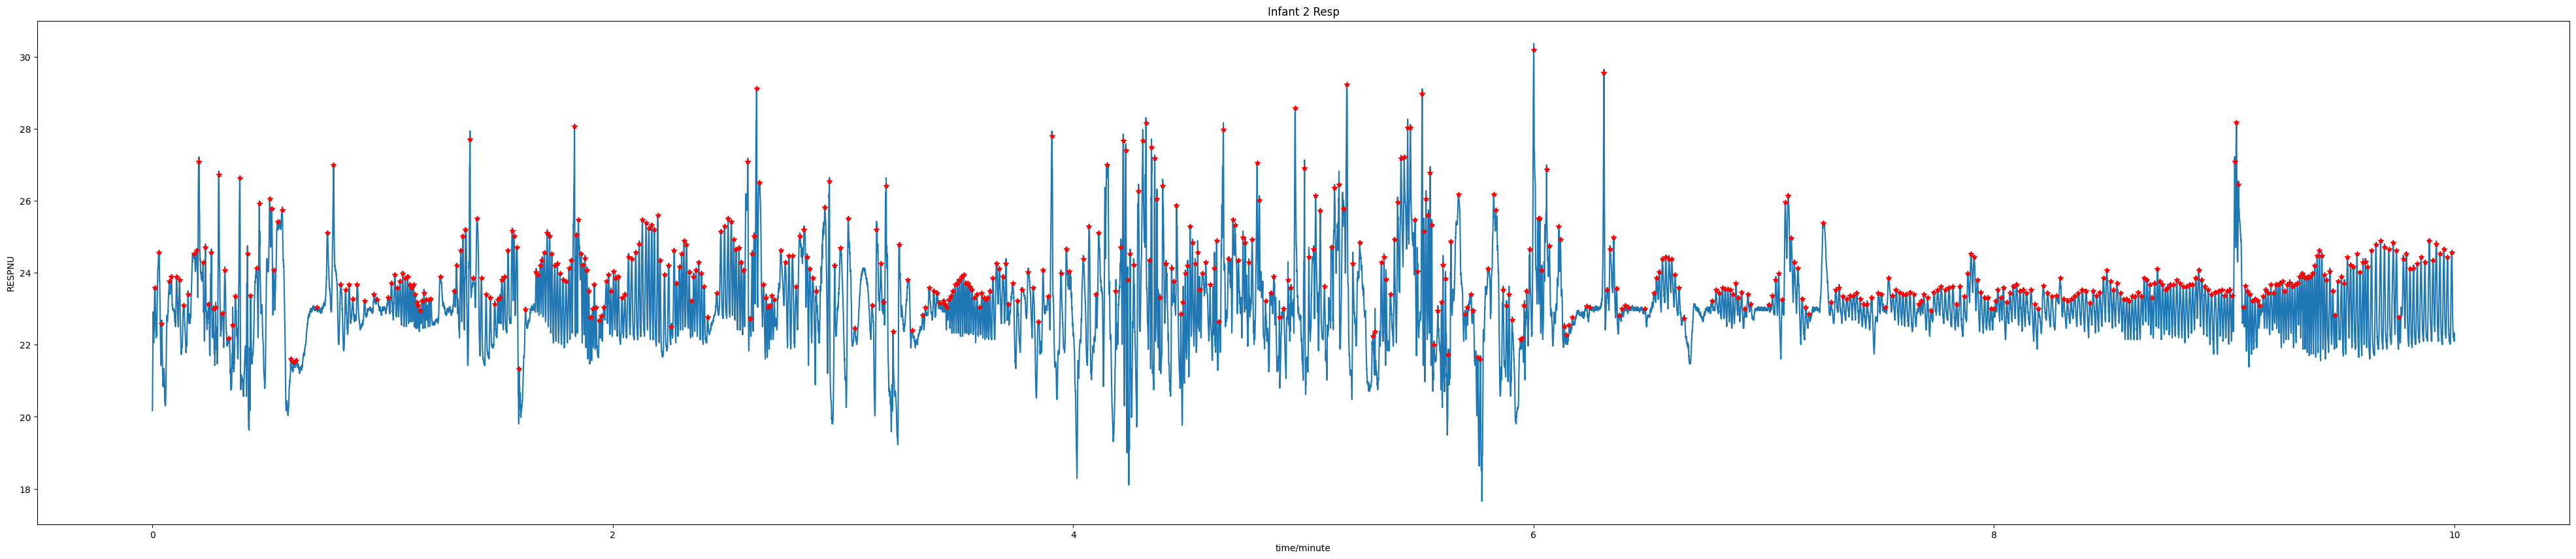

In [180]:
for i in range(0,10,1):
    duration = 30000 # 10 mins 
    startNum = duration*i
    endNum = duration*(i+1)
    signals_resp = wfdb.rdsamp(f"{data_dir}/infant2_resp", sampfrom=startNum, sampto=endNum)
    record_resp = wfdb.rdrecord(f"{data_dir}/infant2_resp", sampfrom=startNum, sampto=endNum)
    annotation_resp = wfdb.rdann(f"{data_dir}/infant2_resp", 'resp', sampfrom=startNum, sampto=endNum, shift_samps=True)
    startTime = (startNum/record_resp.fs)/60
    endTime = (endNum/record_resp.fs)/60
    print(f"Frequency:{record_resp.fs}, Signal Length: {record_resp.sig_len}, Start Time: {startTime} mins, End Time: {endTime} mins")
    print(signals_resp[1])
    # print(annotation_resp.chan)
    wfdb.plot_wfdb(record=record_resp, annotation=annotation_resp,
                    title='Infant 2 Resp',
                    time_units='minutes',
                    figsize=(50,10))


Heart Rate BPM
Frequency:500, Signal Length: 300000, Start Time: 70.0 mins, End Time: 80.0 mins


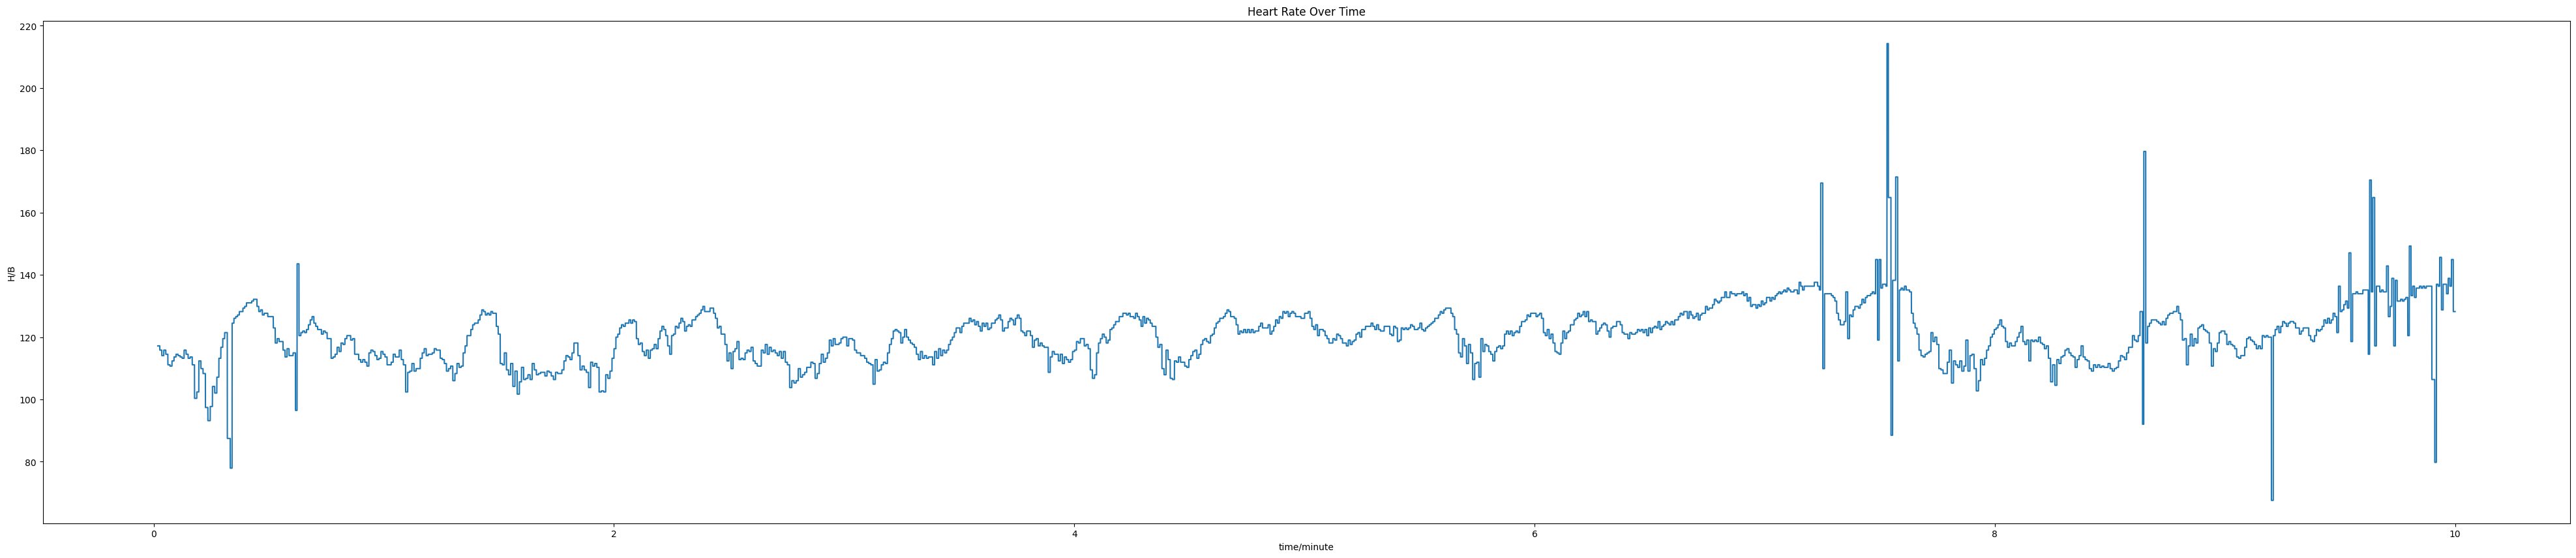

In [188]:
# Calculate heart rate
duration = 300000 # 10 mins 
kth = 7
startNum = duration*kth
endNum = duration*(kth+1)
signals_ecg = wfdb.rdsamp(f"{data_dir}/infant2_ecg", sampfrom=startNum, sampto=endNum)
record_ecg = wfdb.rdrecord(f"{data_dir}/infant2_ecg", sampfrom=startNum, sampto=endNum)
annotation_ecg = wfdb.rdann(f"{data_dir}/infant2_ecg", 'qrsc', sampfrom=startNum, sampto=endNum, shift_samps=True)
startTime = (startNum/record_ecg.fs)/60
endTime = (endNum/record_ecg.fs)/60

print("Heart Rate BPM")
print(f"Frequency:{record_ecg.fs}, Signal Length: {record_ecg.sig_len}, Start Time: {startTime} mins, End Time: {endTime} mins")

qrs_inds = processing.qrs.gqrs_detect(sig=signals_ecg[0], fs=record_ecg.fs)
signals_heartrate = processing.hr.compute_hr(sig_len=record_ecg.p_signal.shape[0], qrs_inds=qrs_inds, fs=record_ecg.fs)
wfdb.plot_items(signal=signals_heartrate, 
                fs=record_ecg.fs, 
                time_units='minutes', 
                sig_name='Heart Rate', 
                sig_units='Beats per Minute', 
                title='Heart Rate Over Time', 
                figsize=(50,10))


In [224]:
def moving_avg(arr, window_size):
    output = []
    for i in range(0,len(arr),window_size):
        val = sum(arr[i:i+window_size-1]) / window_size
        output.append(val)
    return output

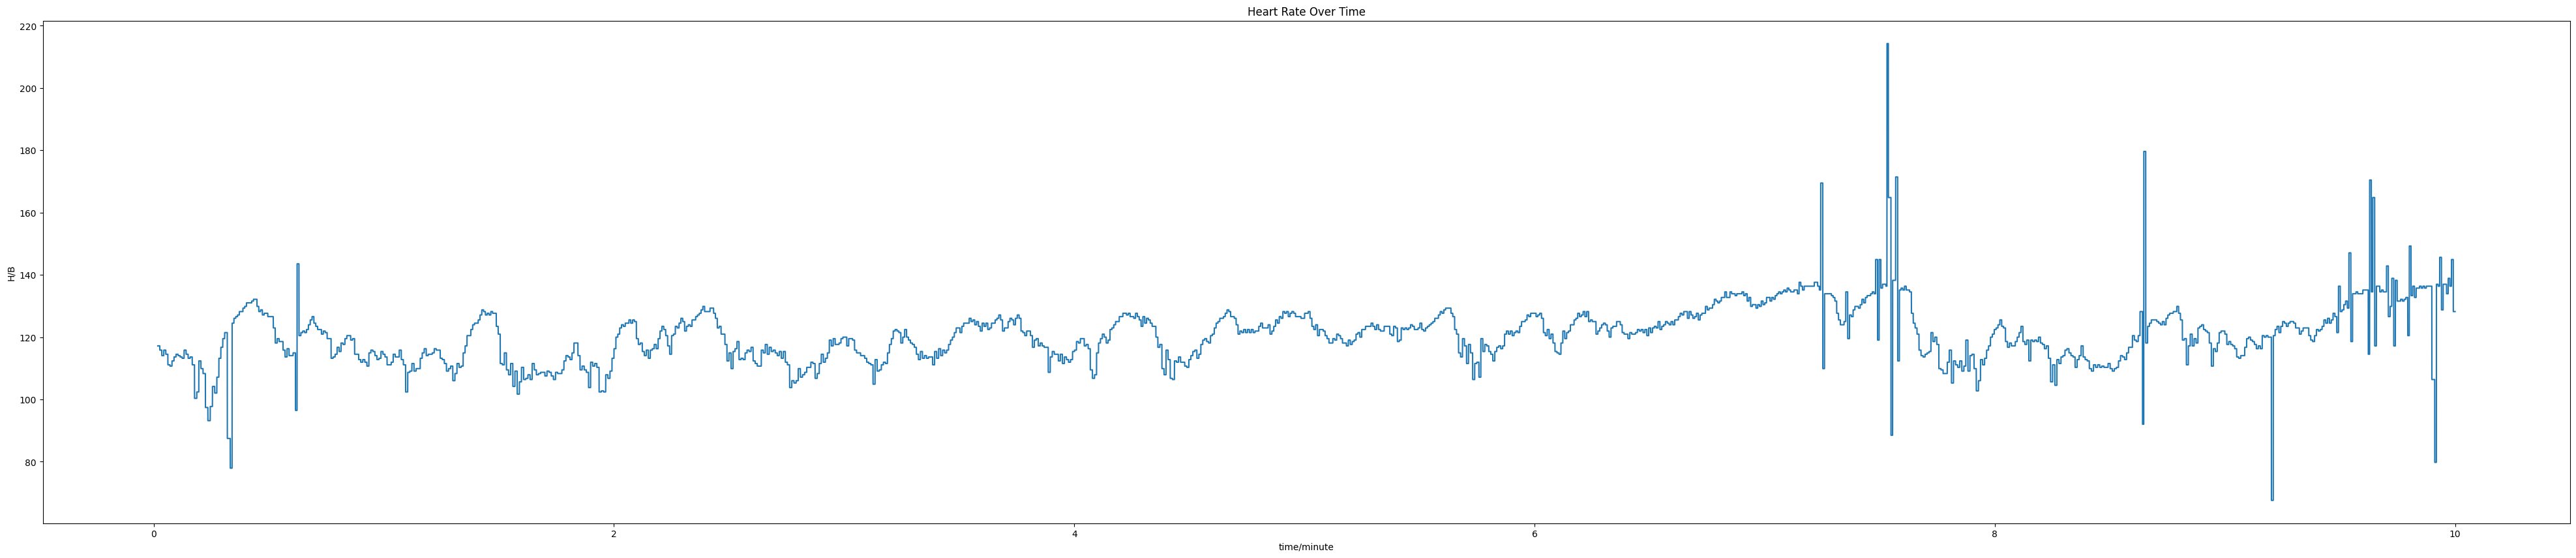

(300000,)
(30000,)


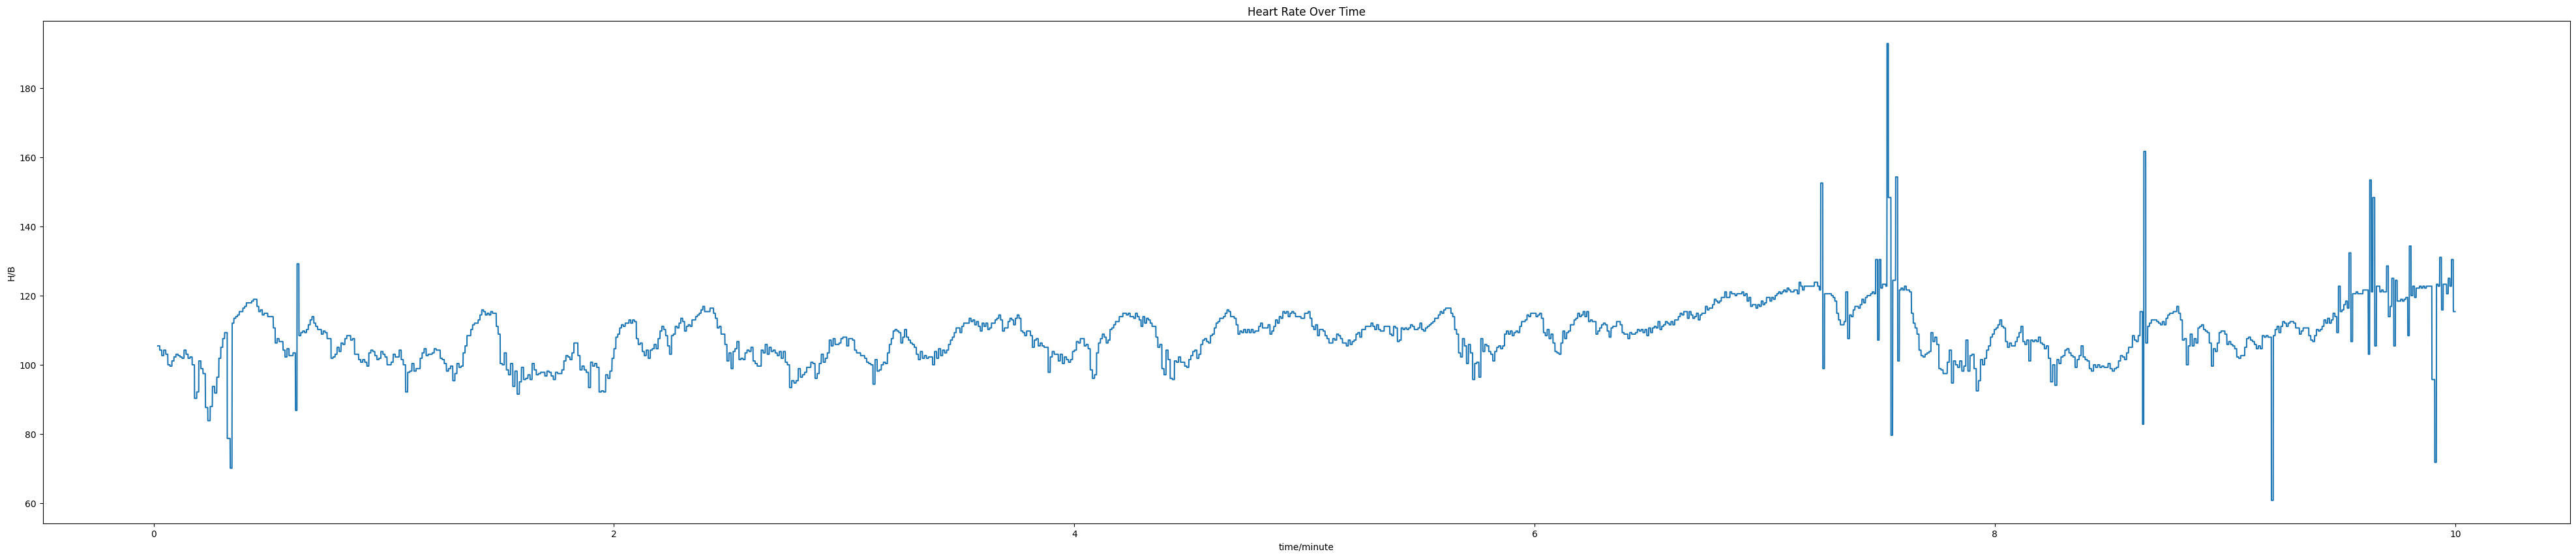

In [230]:
# Resample the data 

wfdb.plot_items(signal=signals_heartrate, 
                fs=500, 
                time_units='minutes', 
                sig_name='Heart Rate', 
                sig_units='Beats per Minute', 
                title='Heart Rate Over Time', 
                figsize=(50,10))
# print(type(signals_heartrate))
# signals_heartrate_50, tiem = processing.resample_sig(signals_heartrate, 500, 50)
signals_heartrate_50 = signals_heartrate.tolist() 
signals_heartrate_50 = moving_avg(signals_heartrate,10)
signals_heartrate_50 = np.array(signals_heartrate_50)
print(signals_heartrate.shape)
print(signals_heartrate_50.shape)
wfdb.plot_items(signal=signals_heartrate_50, 
                fs=50, 
                time_units='minutes', 
                sig_name='Heart Rate', 
                sig_units='Beats per Minute', 
                title='Heart Rate Over Time', 
                figsize=(50,10))

Frequency:50, Signal Length: 30000, Start Time: 70.0 mins, End Time: 80.0 mins
{'fs': 50, 'sig_len': 30000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}


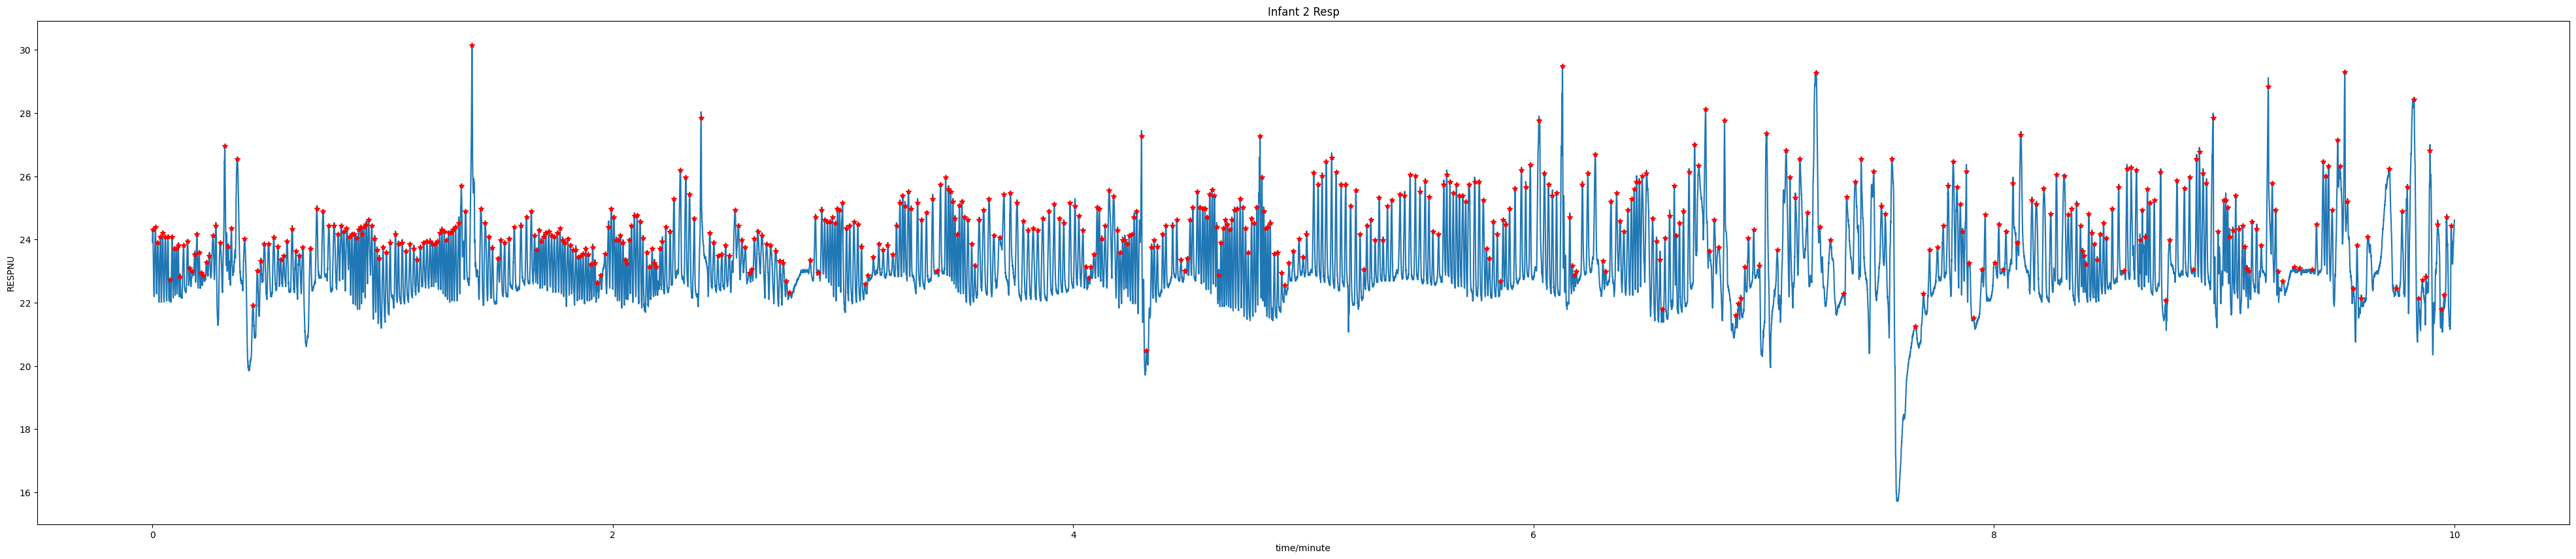

In [195]:
duration = 30000 # 10 mins 
kth = 7
startNum = duration*kth
endNum = duration*(kth+1)
signals_resp = wfdb.rdsamp(f"{data_dir}/infant2_resp", sampfrom=startNum, sampto=endNum)
record_resp = wfdb.rdrecord(f"{data_dir}/infant2_resp", sampfrom=startNum, sampto=endNum)
annotation_resp = wfdb.rdann(f"{data_dir}/infant2_resp", 'resp', sampfrom=startNum, sampto=endNum, shift_samps=True)
startTime = (startNum/record_resp.fs)/60
endTime = (endNum/record_resp.fs)/60
print(f"Frequency:{record_resp.fs}, Signal Length: {record_resp.sig_len}, Start Time: {startTime} mins, End Time: {endTime} mins")
print(signals_resp[1])
# print(annotation_resp.chan)
wfdb.plot_wfdb(record=record_resp, annotation=annotation_resp,
               title='Infant 2 Resp',
               time_units='minutes',
               figsize=(50,10))

(30000, 1)
(30000, 1)
(30000, 1)


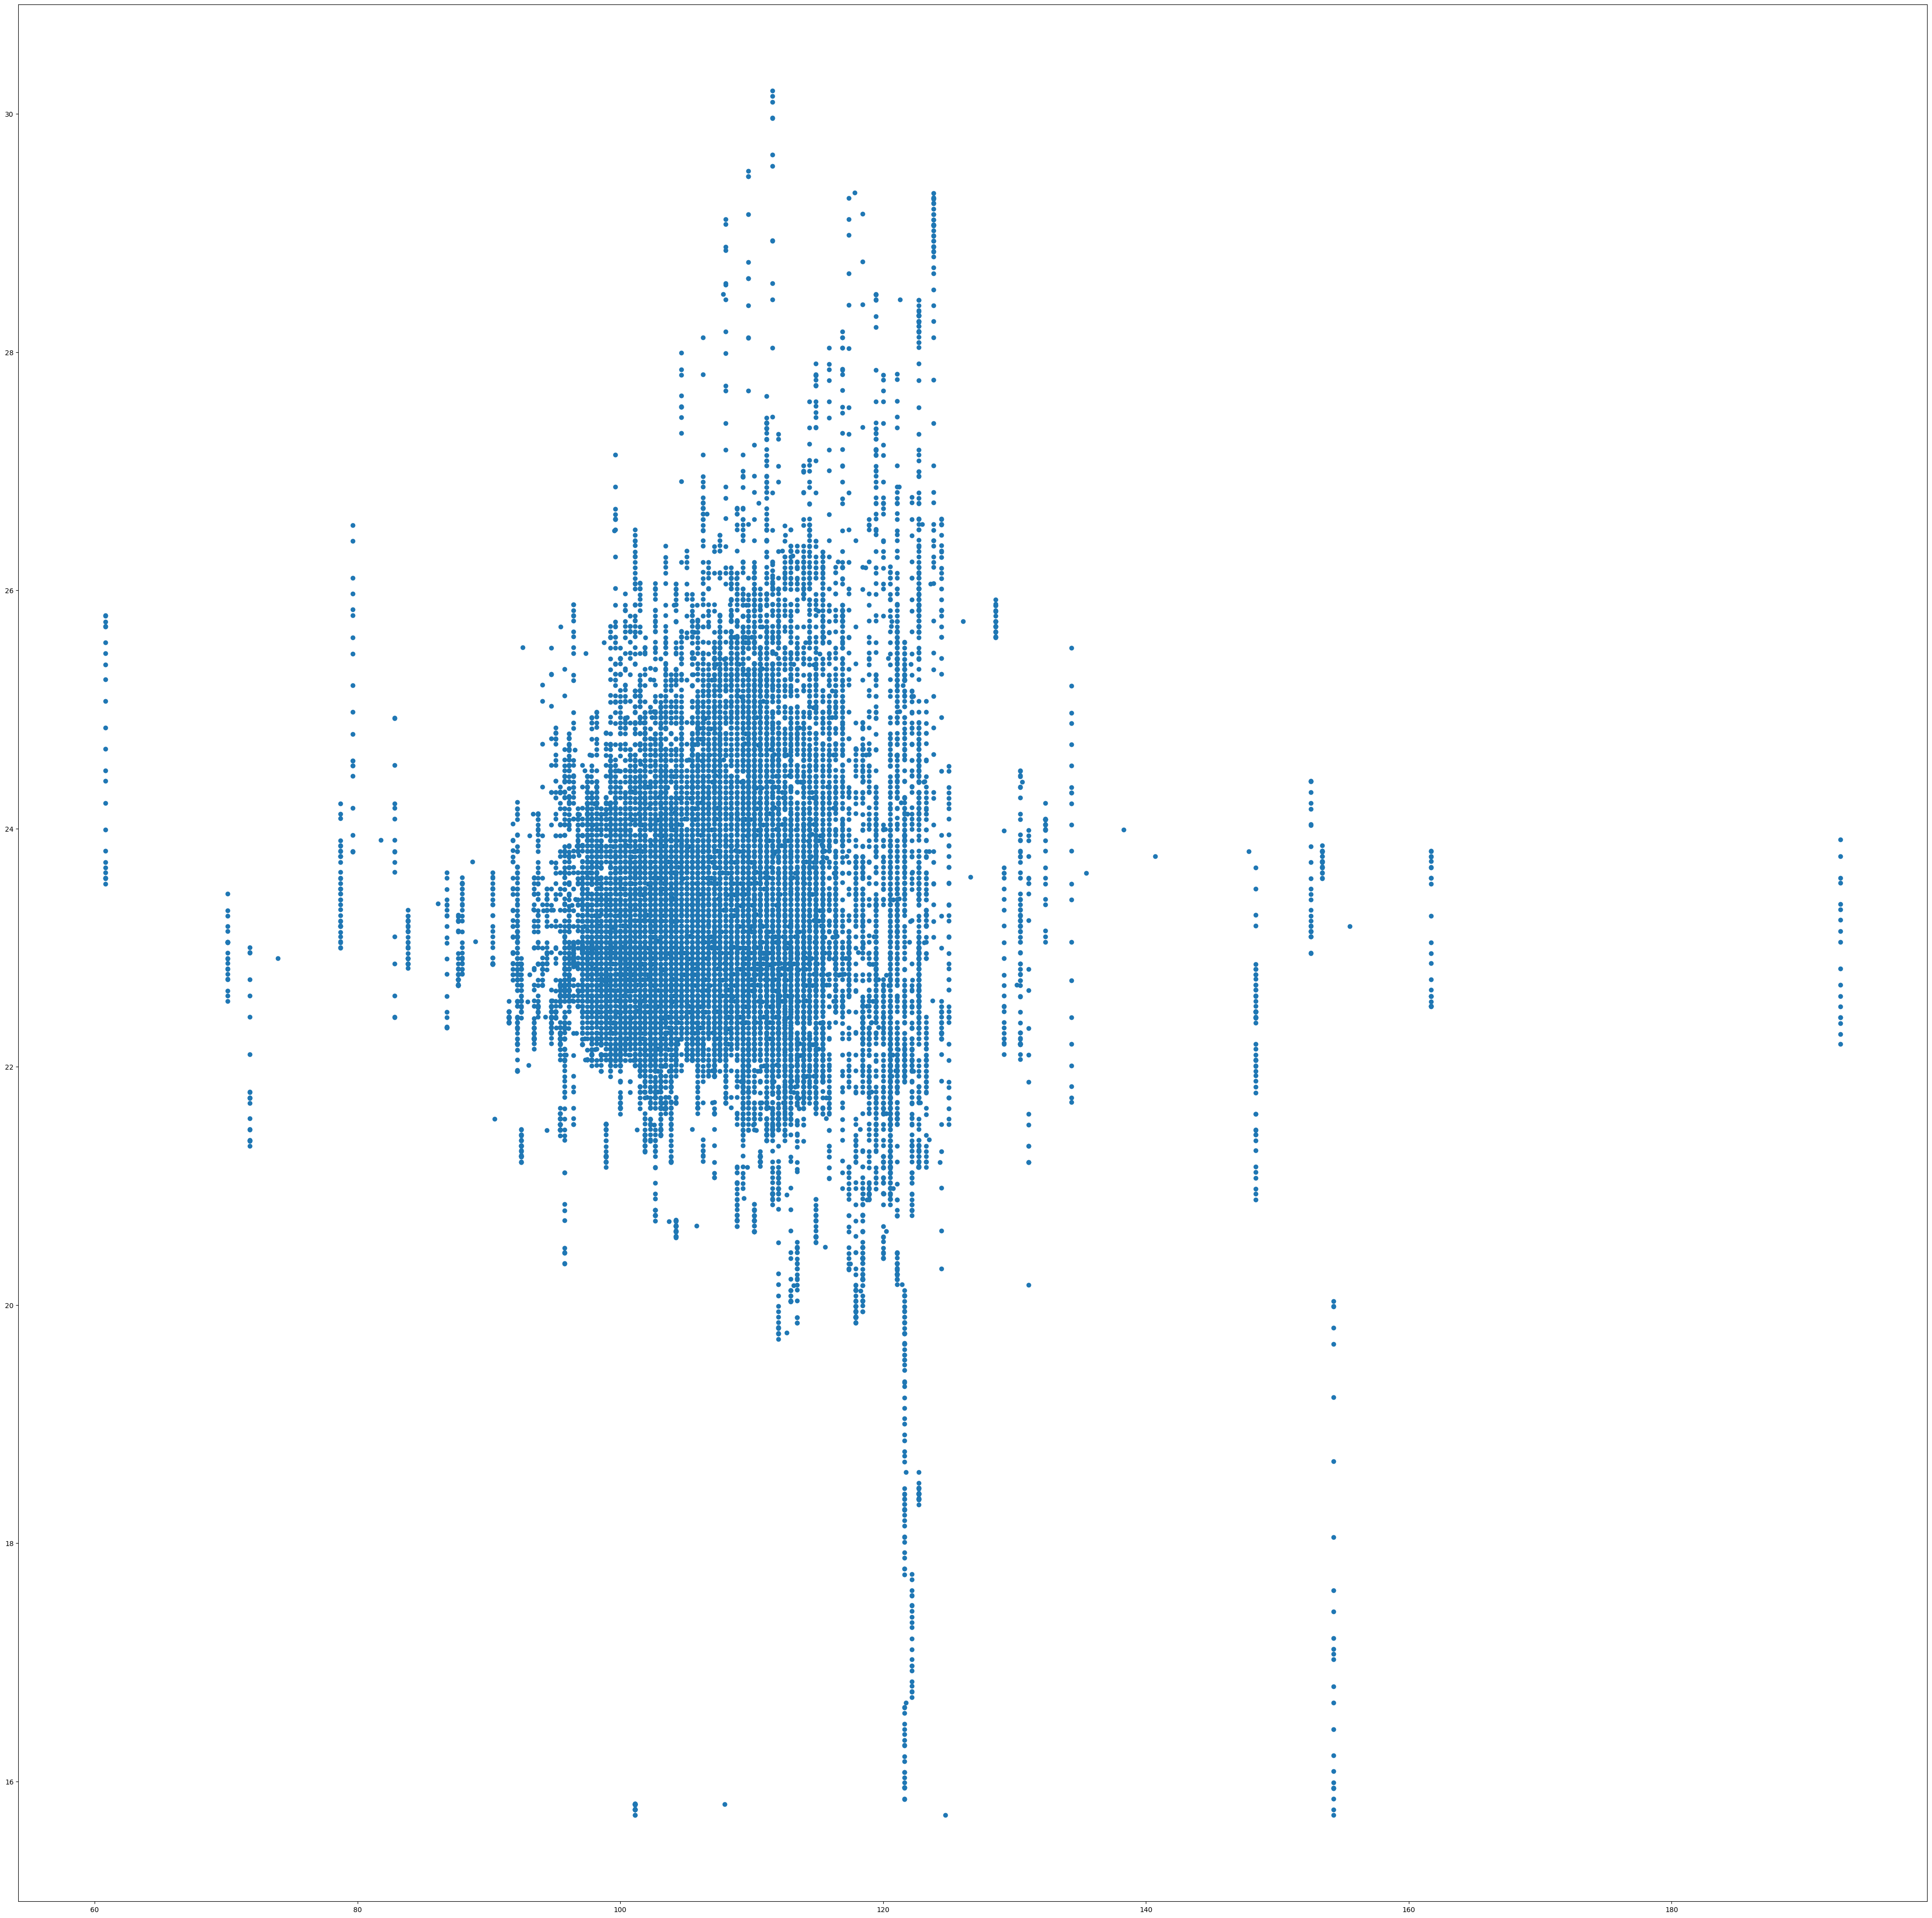

In [259]:

print(signals_heartrate_50.shape)
signals_heartrate_50 = np.reshape(signals_heartrate_50,(signals_heartrate_50.shape[0],1))
print(signals_heartrate_50.shape)
signals_resp_1 = np.array(signals_resp[0])
print(signals_resp_1.shape)
plt.figure(1, figsize=(50,50))
plt.scatter(signals_heartrate_50,signals_resp_1, )

In [263]:
from scipy.fft import fft, fftfreq

(30000, 1)


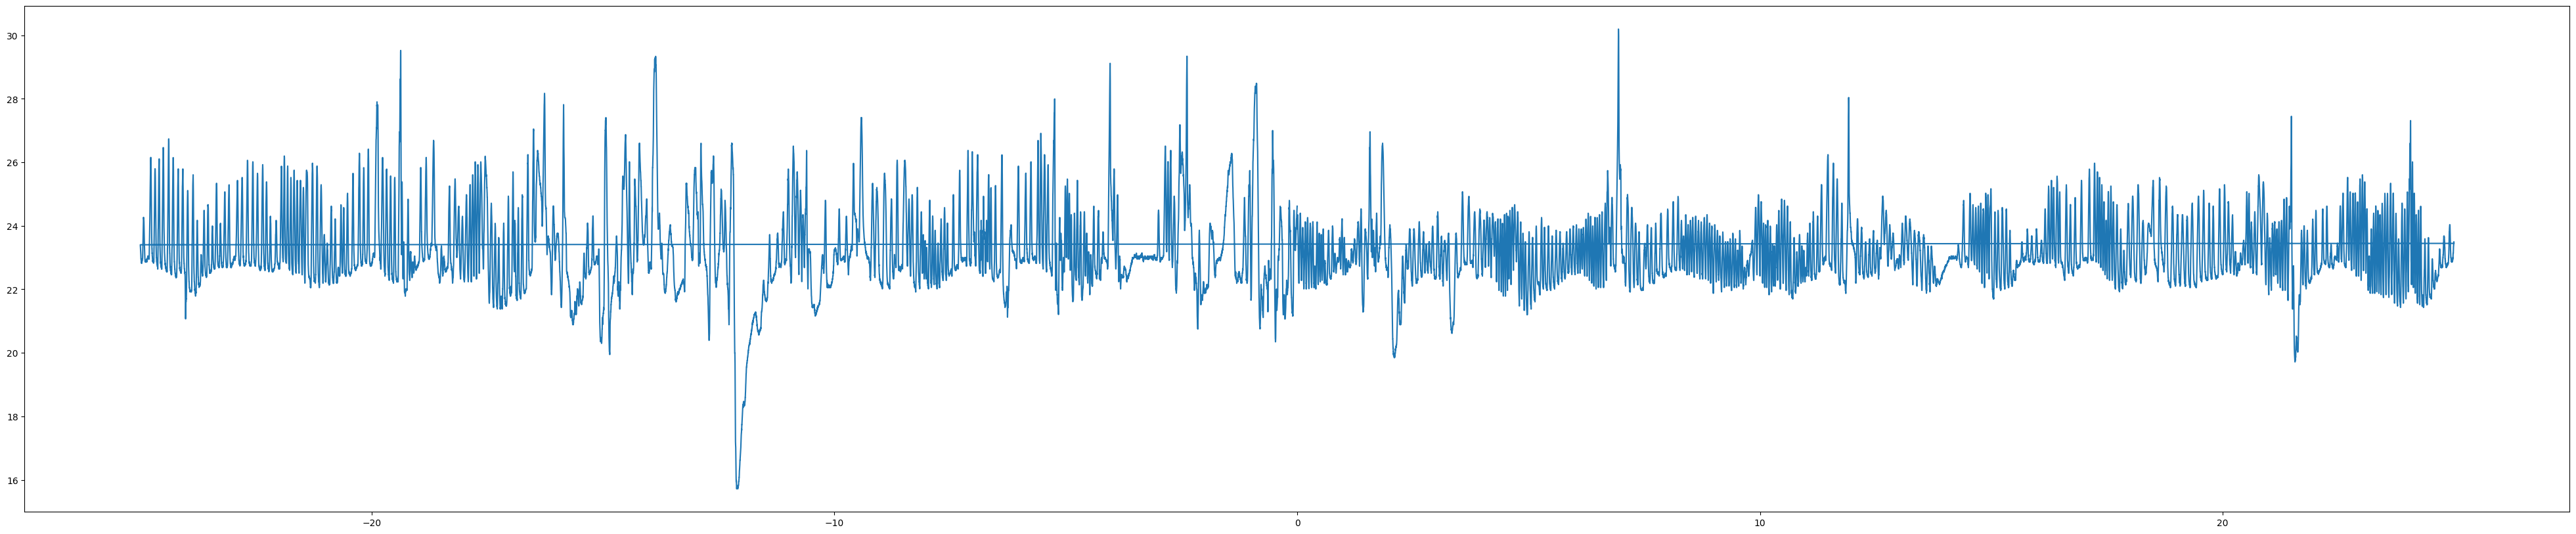

In [267]:
SAMPLE_RATE = 50
N = signals_resp_1.shape[0]

yf = fft(signals_resp_1)
print(yf.shape)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.figure(1,figsize=(50,10))
plt.plot(xf, np.abs(yf))


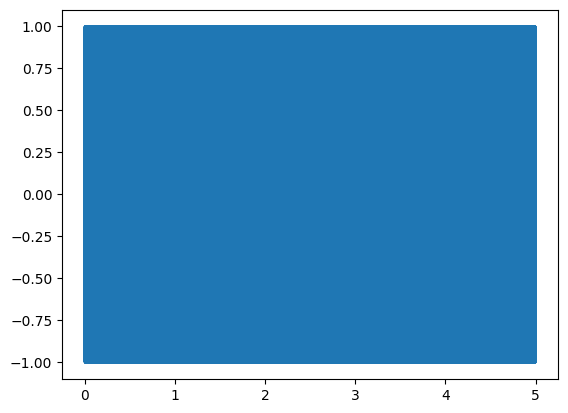

(220500,)
[-1.39124757e-10-0.00000000e+00j -6.82994276e-11+8.29677208e-11j
 -3.92827475e-10+1.16379745e-10j ...  4.35942178e-10-4.67249373e-10j
 -3.92827475e-10-1.16379745e-10j -6.82994276e-11-8.29677208e-11j]
[ 0.   0.2  0.4 ... -0.6 -0.4 -0.2]


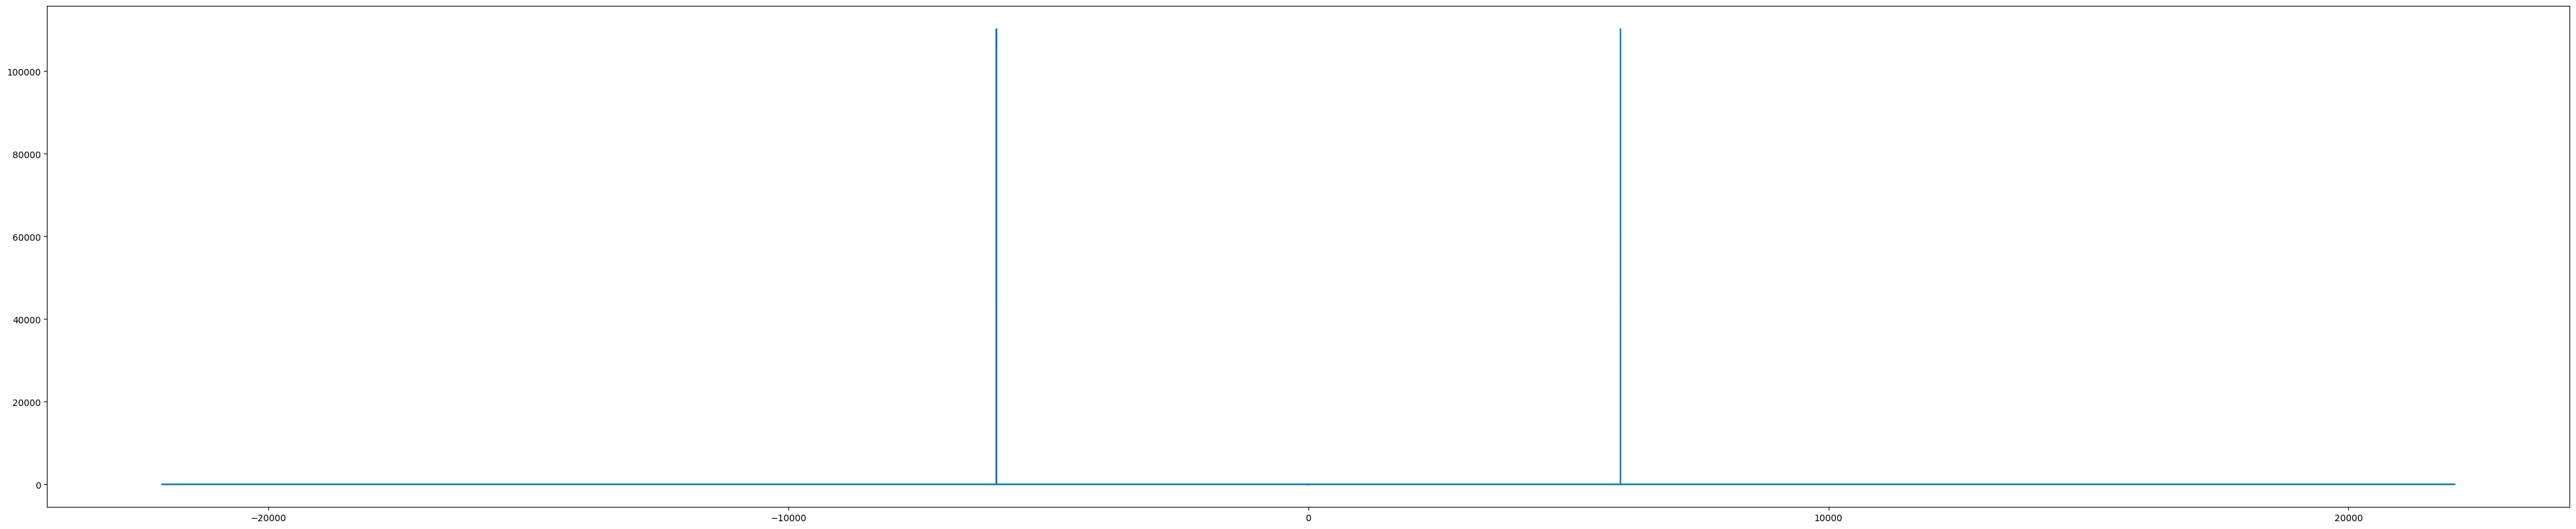

In [273]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(6000, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

N = SAMPLE_RATE * DURATION

yf = fft(y)
print(yf.shape)
xf = fftfreq(N, 1 / SAMPLE_RATE)
print(yf)
print(xf)
plt.figure(1,figsize=(50,10))
plt.plot(xf, np.abs(yf))